# 2.1 Tiền xử lý dữ liệu

## Đọc dữ liệu

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os
# from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
local_zip = '/content/drive/MyDrive/MachineLearning/Project Final/data/data.zip'
extract_to = '/content/'
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [4]:
base_dir = 'liver_cirrhosis.csv'
data = pd.read_csv(base_dir)

## Mô tả dữ liệu

In [5]:
data

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

## Thống kê dữ liệu sơ bộ

In [7]:
# Kiểm tra số lượng giá trị thiếu ở từng cột
data.isnull().sum()

,0
N_Days,0
Status,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


Không có giá trị thiếu

In [8]:
# Bỏ các giá trị trùng lặp
data.drop_duplicates(inplace=True)

In [9]:
data.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000
mean,1910.982571,18429.717606,3.228571,371.706706,3.496118,97.027569,1973.572709,122.317487,123.587337,253.787605,10.713328,2.029152
std,1093.620373,3693.953156,4.512278,197.824339,0.382319,73.108854,1827.063380,47.653515,55.206301,95.740700,0.922026,0.809956
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1103.000000,15628.000000,0.800000,271.000000,3.290000,51.000000,1031.000000,89.900000,93.000000,188.000000,10.000000,1.000000
50%,1690.000000,18628.000000,1.300000,369.510563,3.520000,97.648387,1713.000000,122.556346,124.702128,249.000000,10.600000,2.000000
75%,2598.000000,20819.000000,3.300000,369.510563,3.760000,102.000000,1982.655769,134.850000,125.000000,307.000000,11.100000,3.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.000000


- Cột Age cần chuyển từ ngày thành năm
- Cột Cholesterol có max là quá lớn . Nó bất thường về mặt y tế và có thể là nhập liệu sai
- Cột Copper là nồng độ Đồng trong máu. Với giá trị tối thiểu 4 µg/dL là bất thường
- Cột Alk_Phos là Alkaline Phosphatase. có giá trị max bất thường do ngay cả trong các bệnh lý nghiêm trọng (như tắc mật hoặc ung thư gan), ALK hiếm khi vượt quá 2000–3000 U/L.
- count của tất cả các biến đều = 25000 => Không có missing value trong các cột

In [10]:
# Chuyển đổi Age từ ngày sang năm
data['Age'] = data['Age'] / 365
data['Age'] = data['Age'].round(2)

## Phân tích các trường

In [11]:
data_num = data.select_dtypes(['int','Float64'])

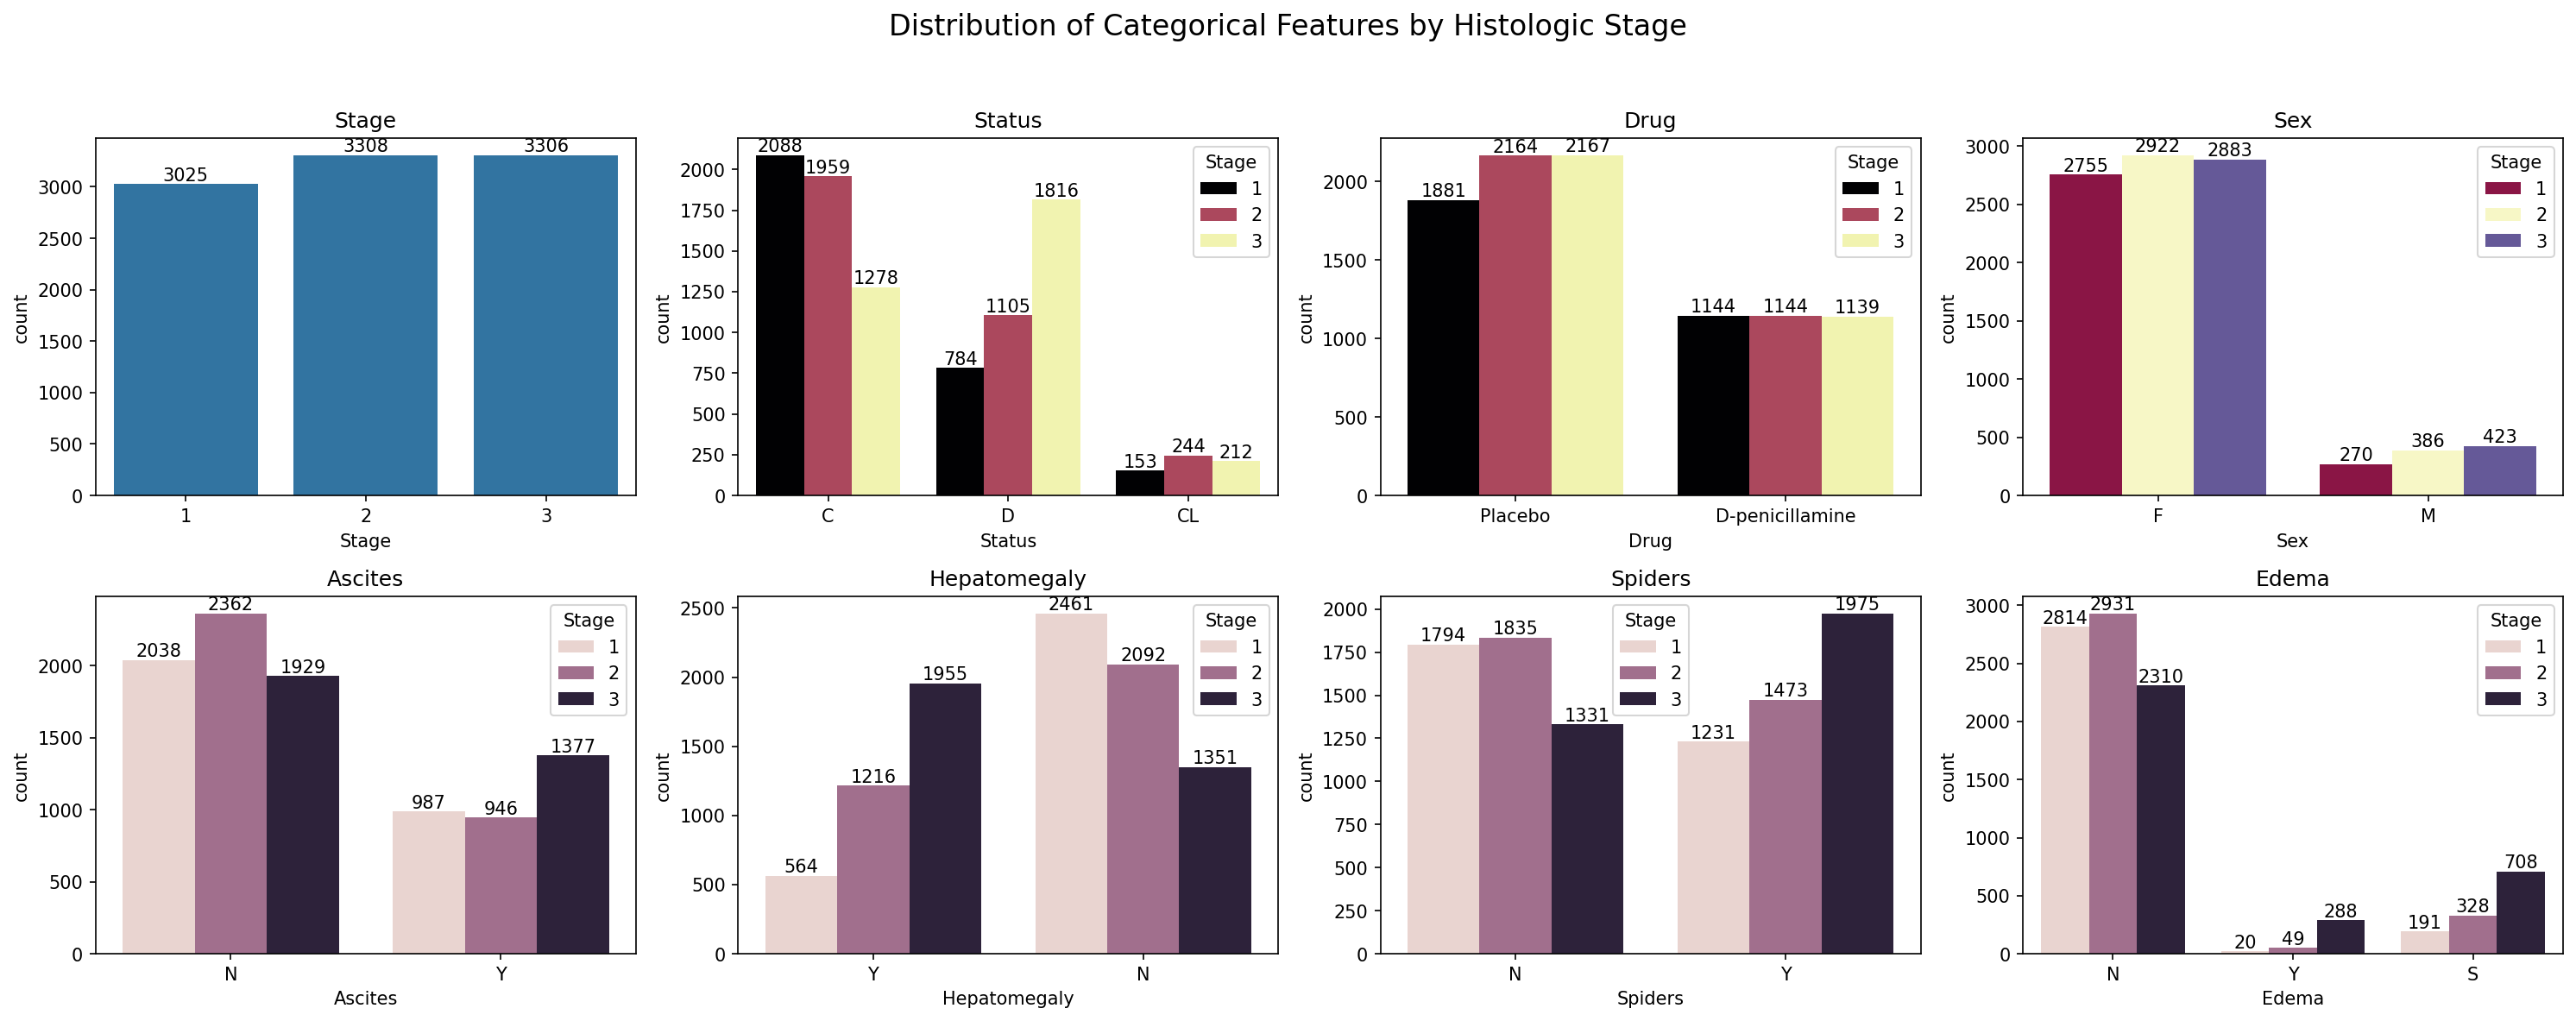

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 4, figsize=(20, 8), dpi=150)
fig.suptitle('Distribution of Categorical Features by Histologic Stage', fontsize=16)

# Hàng 1
a = sns.countplot(data=data, x='Stage', ax=axes[0, 0])
a.set_title('Stage')
for i in a.containers:
    a.bar_label(i,)

a = sns.countplot(data=data, x="Status", palette="inferno", hue='Stage', ax=axes[0, 1])
a.set_title('Status')
for i in a.containers:
    a.bar_label(i,)

a = sns.countplot(data=data, x="Drug", palette='inferno', hue='Stage', ax=axes[0, 2])
a.set_title('Drug')
for i in a.containers:
    a.bar_label(i,)

a = sns.countplot(data=data, x="Sex", palette='Spectral', hue='Stage', ax=axes[0, 3])
a.set_title('Sex')
for i in a.containers:
    a.bar_label(i,)

# Hàng 2
a = sns.countplot(data=data, x='Ascites', hue='Stage', ax=axes[1, 0])
a.set_title('Ascites')
for i in a.containers:
    a.bar_label(i,)

a = sns.countplot(data=data, x='Hepatomegaly', hue='Stage', ax=axes[1, 1])
a.set_title('Hepatomegaly')
for i in a.containers:
    a.bar_label(i,)

a = sns.countplot(data=data, x='Spiders', hue='Stage', ax=axes[1, 2])
a.set_title('Spiders')
for i in a.containers:
    a.bar_label(i,)

a = sns.countplot(data=data, x='Edema', hue='Stage', ax=axes[1, 3])
a.set_title('Edema')
for i in a.containers:
    a.bar_label(i,)

fig.tight_layout(rect=[0, 0, 1, 0.95])  # chừa chỗ cho tiêu đề
plt.show()

- Biến mục tiêu Stage (Giai đoạn bệnh):
→ Ta có thể thấy rằng biến mục tiêu Stage được phân bố khá đồng đều giữa ba giai đoạn. Do đó, tập dữ liệu này không bị mất cân bằng nghiêm trọng, và có thể sử dụng trực tiếp để xây dựng mô hình mà không cần thực hiện kỹ thuật cân bằng lại dữ liệu.

- Biến Status (Tình trạng bệnh nhân):
→ Với các bệnh nhân còn sống (censored), phần lớn thuộc giai đoạn 1.
→ Với các trường hợp ghép gan, số bệnh nhân ở cả ba giai đoạn gần như ngang nhau.
→ Đối với các ca tử vong, đa số bệnh nhân thuộc giai đoạn 3, cho thấy mức độ nghiêm trọng hơn.

- Biến Drug (Loại thuốc sử dụng):
→ Biểu đồ cho biết số lượng bệnh nhân được sử dụng giả dược (placebo) và thuốc D-penicillamine. Đây là thông tin về phương pháp điều trị của bệnh nhân.

- Biến Sex (Giới tính):
→ Thể hiện số lượng bệnh nhân ở giai đoạn 1, 2 và 3 được phân bố theo hai giới tính nam và nữ. Điều này giúp ta quan sát liệu có sự khác biệt nào về mức độ bệnh giữa nam và nữ không.

- Biến Ascites (Cổ trướng):
→ Trong số những bệnh nhân có cổ trướng, phần lớn thuộc giai đoạn 3, cho thấy cổ trướng thường xuất hiện ở giai đoạn nặng hơn của bệnh xơ gan.

- Biến Hepatomegaly (Gan to):
→ Trong số bệnh nhân bị gan to, đa số lại thuộc giai đoạn 1, có thể cho thấy gan to là biểu hiện xuất hiện sớm trong quá trình phát triển bệnh.

- Biến Spiders (Giãn mao mạch hình mạng nhện):
→ Hầu hết bệnh nhân có biểu hiện này đều ở giai đoạn 3, cho thấy đây là triệu chứng phổ biến ở giai đoạn muộn của xơ gan.

- Biến Edema (Phù):
→ Phần lớn bệnh nhân không bị phù.
→ Trong nhóm có phù nhưng giảm nhờ thuốc hoặc không cần thuốc, đa số thuộc giai đoạn 3.
→ Tương tự, trong nhóm phù không đáp ứng điều trị, đa số cũng là bệnh nhân ở giai đoạn 3 → cho thấy phù là triệu chứng nghiêm trọng ở giai đoạn nặng.

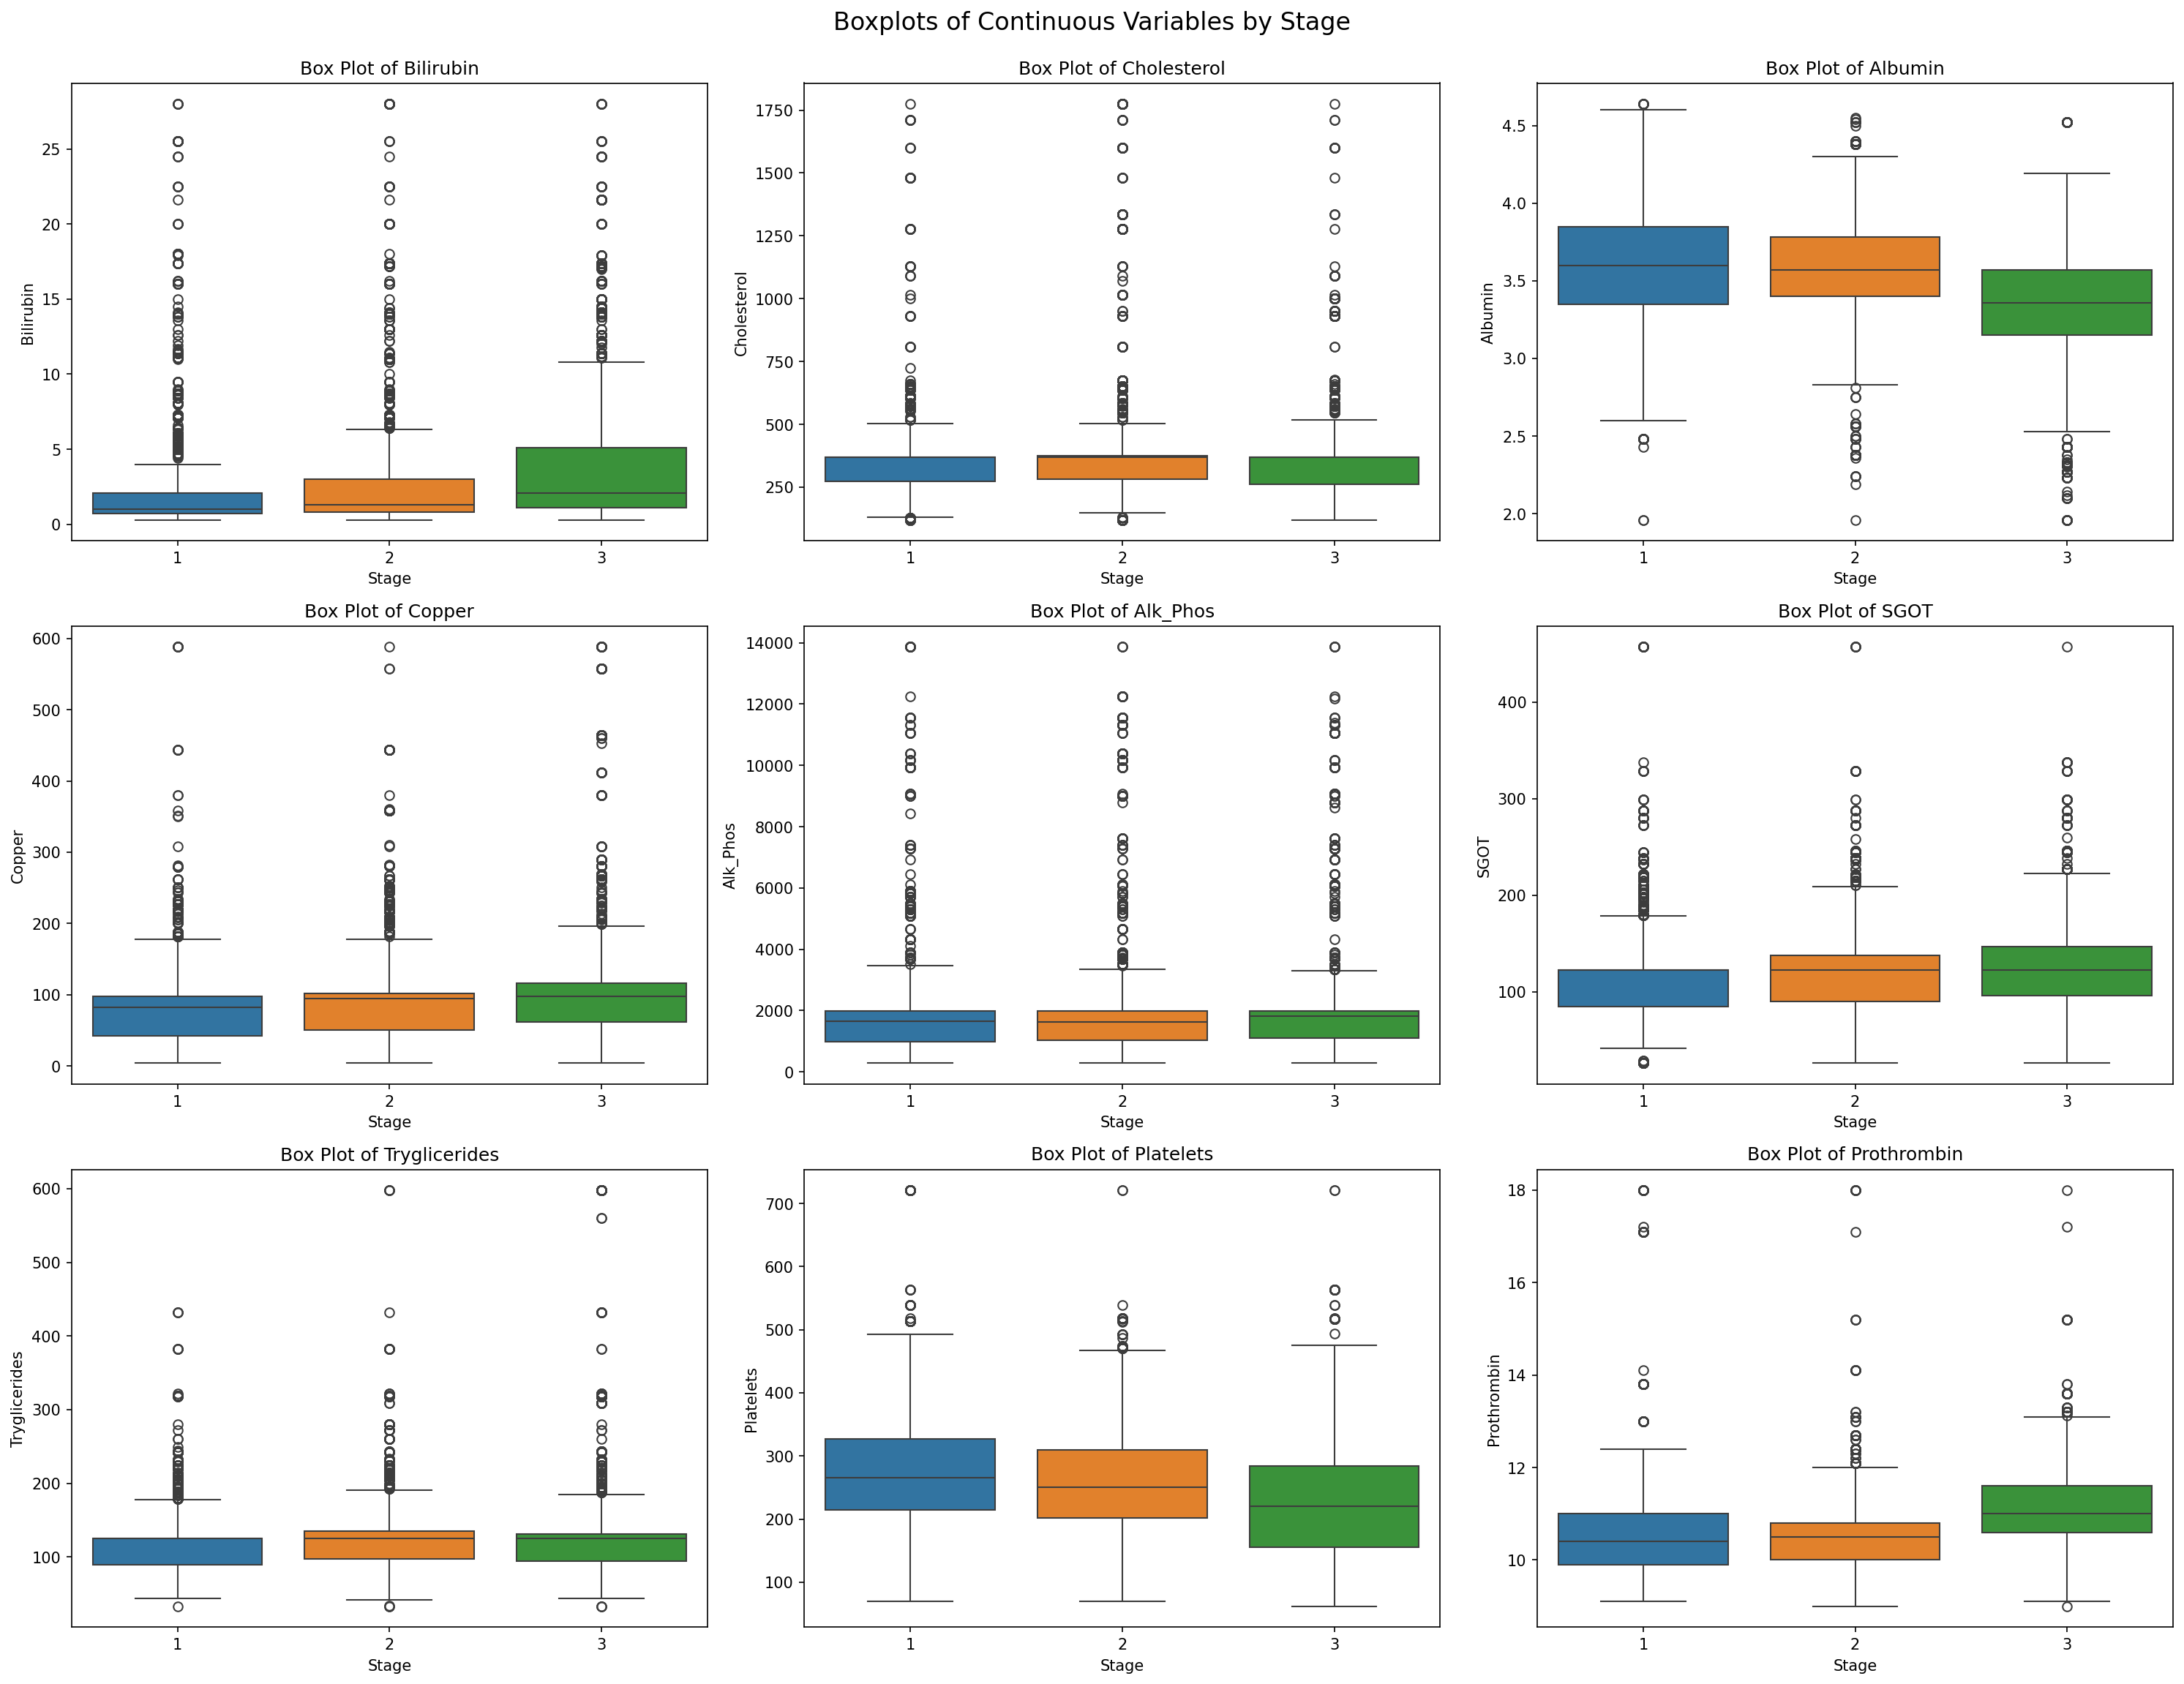

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

col = list(data.select_dtypes(include='number').drop(['Stage', 'N_Days', 'Age'], axis=1).columns)

fig, axes = plt.subplots(3, 3, figsize=(20, 15), dpi=150)
k = 0
for i in range(3):
    for j in range(3):
        if k < len(col):
            sns.boxplot(data=data, x='Stage', y=col[k], hue='Stage', ax=axes[i, j], palette='tab10', legend=False)
            axes[i, j].set_title(f'Box Plot of {col[k]}', fontsize=12)
            k += 1
        else:
            axes[i, j].axis('off')
plt.tight_layout()
plt.suptitle('Boxplots of Continuous Variables by Stage', fontsize=16, y=1.02)
plt.show()



- Bilirubin (mức bilirubin trong máu):

    Ở giai đoạn 3, mức bilirubin dao động trong khoảng 0–11 mg/dl.

    Ở giai đoạn 2, mức bilirubin nằm trong khoảng 0–5 mg/dl, thấp hơn giai đoạn 3.

    Nhìn chung, giai đoạn 2 có mức bilirubin thấp hơn 5 mg/dl.

    Số lượng giá trị ngoại lai (outlier) ở giai đoạn 3 ít hơn so với giai đoạn 2 và 1, cho thấy dữ liệu ổn định hơn.

- Cholesterol (mức cholesterol trong máu):

    Mức cholesterol ở cả ba giai đoạn tương đối giống nhau, chủ yếu dao động trong khoảng 100–500 mg/dl.

- Albumin (một loại protein trong máu):

    Bệnh nhân ở giai đoạn 3 có mức albumin thấp hơn, nằm trong khoảng 2.5–4.25 gm/dl so với giai đoạn 1 và 2.

    Giai đoạn 1 có ít giá trị ngoại lai nhất, cho thấy dữ liệu nhất quán hơn.

- Platelets (số lượng tiểu cầu):

    Cả ba giai đoạn đều có số lượng tiểu cầu nằm trong khoảng dưới 500.

    Tuy nhiên, phần lớn bệnh nhân ở giai đoạn 3 có số lượng tiểu cầu thấp hơn so với giai đoạn 1 và 2.

- Prothrombin (một chỉ số đông máu):

    Bệnh nhân giai đoạn 3 có chỉ số prothrombin cao hơn đáng kể so với hai giai đoạn còn lại, phản ánh tình trạng đông máu có thể bị ảnh hưởng nặng hơn.

<Axes: xlabel='Stage', ylabel='Age'>

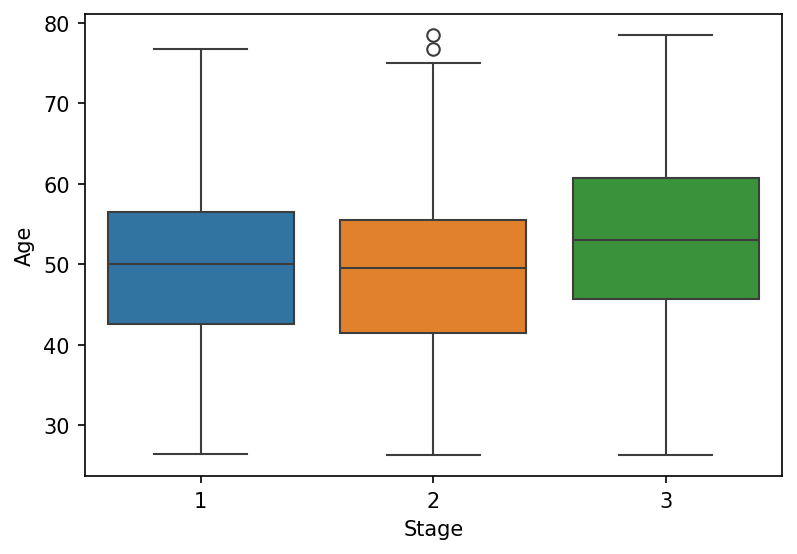

In [14]:
plt.figure(figsize=(6, 4), dpi=150)
sns.boxplot(data=data, x='Stage', y='Age', hue='Stage', palette='tab10', legend=False)


- Bệnh nhân trong độ tuổi 46–61 có nguy cơ cao mắc xơ gan giai đoạn 3.

- Bệnh nhân trong độ tuổi 40–55 thường rơi vào xơ gan giai đoạn 2.

- Bệnh nhân trong độ tuổi 43–57 chủ yếu thuộc giai đoạn 1.

- Có giá trị ngoại lệ ở giai đoạn 2

## Chuyển đổi dữ liệu về dạng hợp lệ (tiền xử lý dữ liệu)

In [15]:
#Chuyển đổi nhị phân
binary_map = {'N': 0, 'Y': 1}
data['Ascites'] = data['Ascites'].map(binary_map)
data['Hepatomegaly'] = data['Hepatomegaly'].map(binary_map)
data['Spiders'] = data['Spiders'].map(binary_map)
data['Sex'] = data['Sex'].map({'F': 0, 'M': 1})
data['Drug'] = data['Drug'].map({'Placebo': 0, 'D-penicillamine': 1})

In [16]:
# one-hot encoding
data = pd.get_dummies(data, columns=['Edema'], prefix='Edema')
data = pd.get_dummies(data, columns=['Status'], prefix='Status')

# Chuyển toàn bộ các cột bool thành int
data = data.astype({col: 'int' for col in data.columns if data[col].dtype == 'bool'})

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9639 entries, 0 to 24992
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         9639 non-null   int64  
 1   Drug           9639 non-null   int64  
 2   Age            9639 non-null   float64
 3   Sex            9639 non-null   int64  
 4   Ascites        9639 non-null   int64  
 5   Hepatomegaly   9639 non-null   int64  
 6   Spiders        9639 non-null   int64  
 7   Bilirubin      9639 non-null   float64
 8   Cholesterol    9639 non-null   float64
 9   Albumin        9639 non-null   float64
 10  Copper         9639 non-null   float64
 11  Alk_Phos       9639 non-null   float64
 12  SGOT           9639 non-null   float64
 13  Tryglicerides  9639 non-null   float64
 14  Platelets      9639 non-null   float64
 15  Prothrombin    9639 non-null   float64
 16  Stage          9639 non-null   int64  
 17  Edema_N        9639 non-null   int64  
 18  Edema_S     

In [18]:
data

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,...,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_S,Edema_Y,Status_C,Status_CL,Status_D
0,2221,0,50.68,0,0,1,0,0.5,149.000000,4.04,...,57.000000,256.0,9.9,1,1,0,0,1,0,0
1,1230,0,54.04,1,1,0,1,0.5,219.000000,3.93,...,75.000000,220.0,10.8,2,1,0,0,1,0,0
2,4184,0,32.44,0,0,0,0,0.5,320.000000,3.54,...,80.000000,225.0,10.0,2,1,0,0,1,0,0
3,2090,0,45.12,0,0,0,0,0.7,255.000000,3.74,...,58.000000,151.0,10.2,2,1,0,0,0,0,1
4,2105,0,59.45,0,0,1,0,1.9,486.000000,3.54,...,109.000000,151.0,11.5,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24963,3577,0,49.03,0,1,0,1,0.7,369.510563,3.49,...,124.702128,243.0,9.7,1,1,0,0,1,0,0
24971,4795,0,64.04,0,1,0,1,1.8,369.510563,3.24,...,124.702128,139.0,10.5,1,1,0,0,1,0,0
24972,3358,1,67.36,0,0,1,0,2.1,262.000000,3.48,...,84.000000,412.0,11.8,3,1,0,0,0,0,1
24991,4365,1,58.42,0,0,0,0,0.9,346.000000,3.40,...,90.000000,228.0,10.3,2,1,0,0,1,0,0


Kiểm tra phân phối

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hàm để vẽ phân phối của tất cả các cột, sắp xếp thành lưới
def plot_distributions(df, cols_per_row=4):
    # Lấy tất cả các cột
    cols = df.columns.tolist()
    total_cols = len(cols)

    # Tính số hàng cần thiết (mỗi hàng có cols_per_row biểu đồ)
    rows = (total_cols + cols_per_row - 1) // cols_per_row  # Làm tròn lên

    # Tạo figure và axes cho lưới
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 4, rows * 3))
    axes = axes.ravel()  # Chuyển mảng 2D thành 1D để dễ truy cập

    # Duyệt qua từng cột và vẽ biểu đồ
    for i, col in enumerate(cols):
        # Kiểm tra kiểu dữ liệu để quyết định có vẽ KDE hay không
        if df[col].dtype in ['float64', 'int64'] and col not in ['Stage'] and not col.startswith(('Edema_', 'Status_')):
            # Cột số (không phải nhị phân hoặc one-hot): Vẽ histogram + KDE
            sns.histplot(data=df, x=col, kde=True, ax=axes[i])
        else:
            # Cột category hoặc nhị phân: Chỉ vẽ histogram
            sns.histplot(data=df, x=col, kde=False, ax=axes[i])

        # Đặt tiêu đề cho biểu đồ
        axes[i].set_title(col, fontsize=10)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')

    # Ẩn các ô trống nếu số cột ít hơn số ô trong lưới
    for j in range(i + 1, rows * cols_per_row):
        axes[j].axis('off')

    # Điều chỉnh layout để tránh chồng lấn
    plt.tight_layout()
    plt.show()

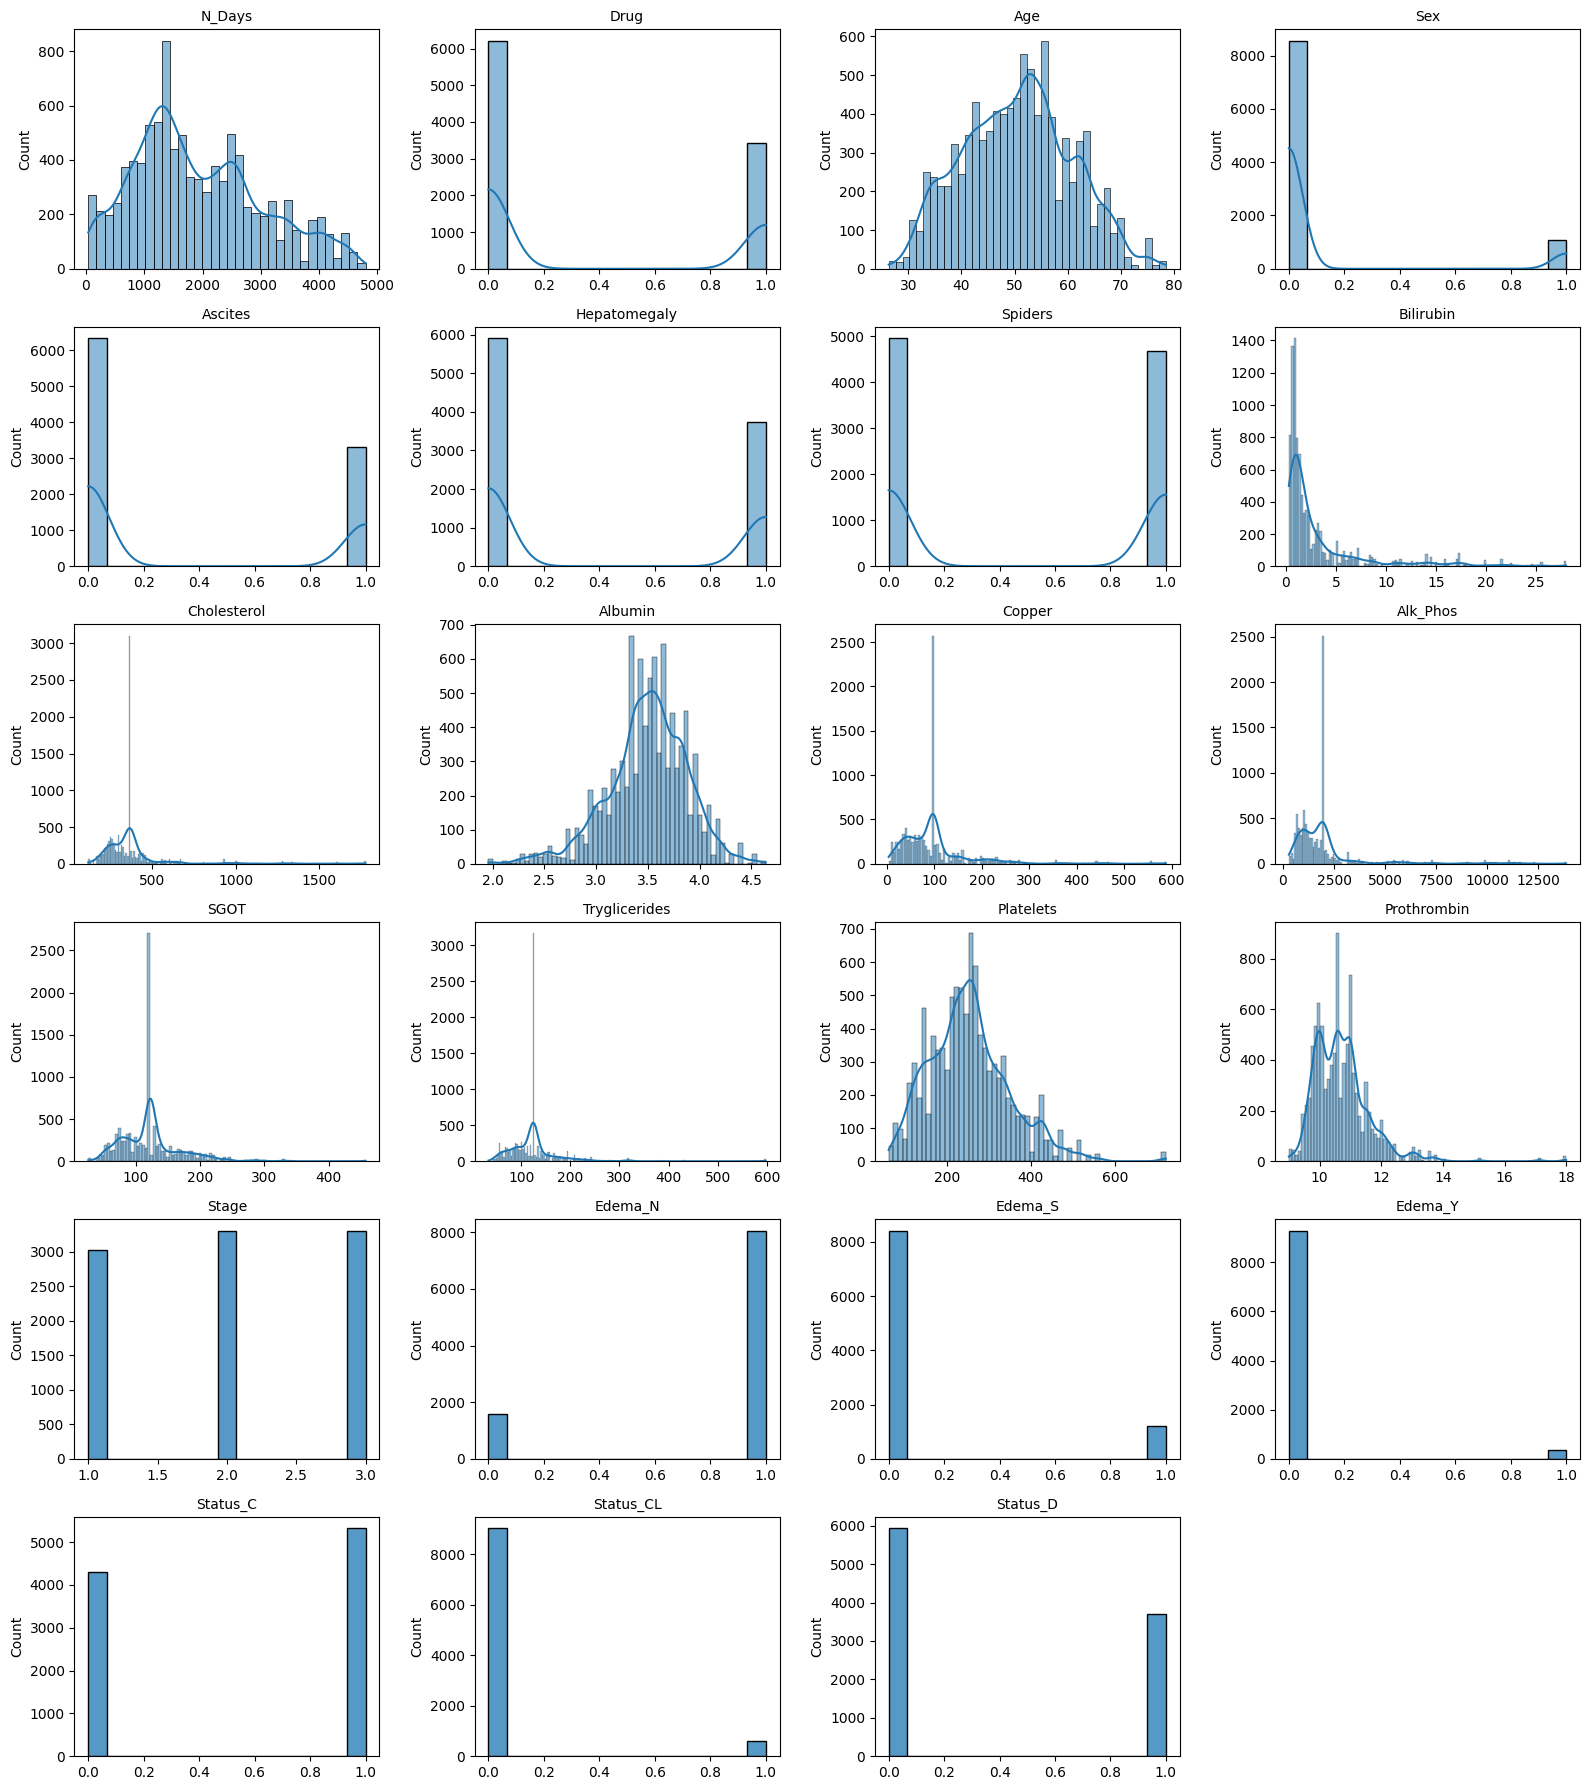

In [20]:
plot_distributions(data)

Kiểm tra outliers

<ipython-input-21-d3d4f11554e0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_num,x=col[k],ax=axes[i,j],palette='Set2')
<ipython-input-21-d3d4f11554e0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_num,x=col[k],ax=axes[i,j],palette='Set2')
<ipython-input-21-d3d4f11554e0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_num,x=col[k],ax=axes[i,j],palette='Set2')
<ipython-input-21-d3d4f11554e0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

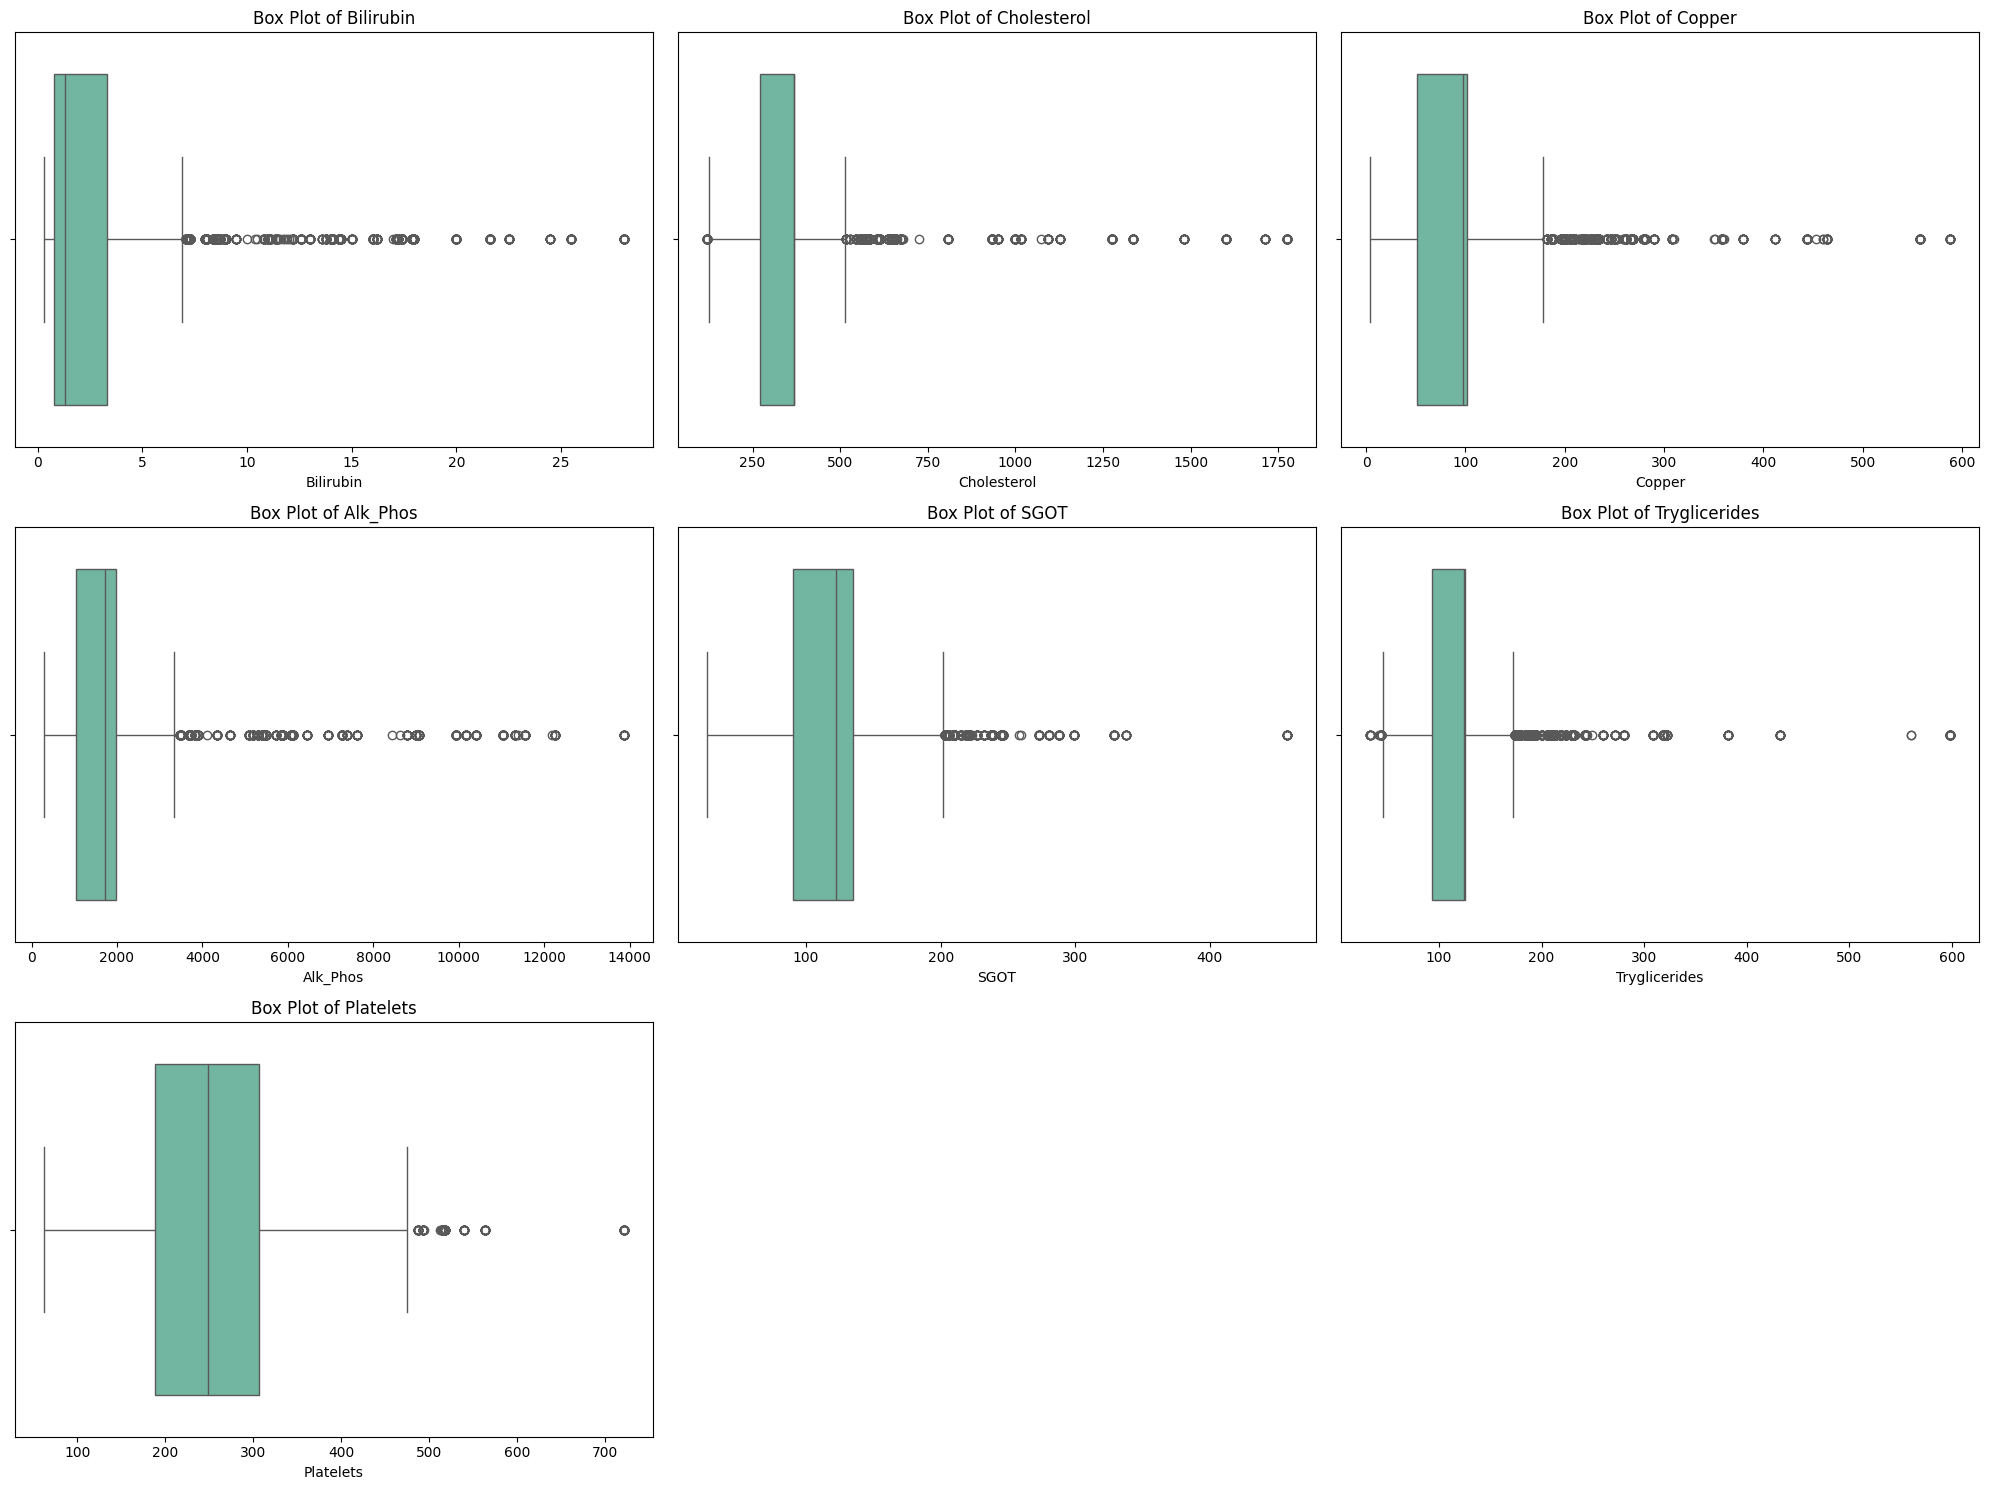

In [21]:
col = list(data_num.drop(['Stage','N_Days','Age', 'Albumin', 'Prothrombin'],axis=1).columns)
fig, axes= plt.subplots(3,3,figsize=(20, 15))
k=0
for i in range(3):
    for j in range(3):
        if (k< len(col)):
            sns.boxplot(data=data_num,x=col[k],ax=axes[i,j],palette='Set2')
            axes[i,j].set_title(f'Box Plot of {col[k]}')
            k+=1
        else:
            axes[i, j].axis('off')
plt.tight_layout();

- Hầu hết các biến đều có nhiều outliers phía bên phải (phân phối lệch phải).
- Có sự khác biệt đáng kể về khoảng giá trị giữa các biến (một số biến có thang đo rất lớn như Alk_Phos, Cholesterol…)
- Các trường như Cholesterol, Alk_Phos, Copper, SGOT, Bilirubin cần phải xử lý outliers

## Xử lý outliers


In [22]:
# Danh sách các cột cần xử lý outliers
cols_to_clip = ['Bilirubin', 'Cholesterol', 'Alk_Phos', 'Copper', 'SGOT']  # Giới hạn vào ngưỡng IQR
cols_to_replace_median = ['Tryglicerides', 'Platelets', 'SGOT']  # Thay bằng median
cols_to_ignore = ['N_Days', 'Age', 'Albumin', 'Prothrombin']  # Không xử lý

# Hàm xử lý outliers
def handle_outliers_custom(df, cols_to_clip, cols_to_replace_median):
    df = df.copy()

    # Xử lý các cột cần clip
    for col in cols_to_clip:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        print(f"Số outliers trong {col} (clip): {outliers.sum()}")
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    # Xử lý các cột cần thay bằng median
    for col in cols_to_replace_median:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
        print(f"Số outliers trong {col} (replace median): {outliers.sum()}")
        median_val = df[col].median()
        df.loc[outliers, col] = median_val

    return df

In [23]:
# Áp dụng xử lý outliers
data = handle_outliers_custom(data, cols_to_clip, cols_to_replace_median)

Số outliers trong Bilirubin (clip): 1192
Số outliers trong Cholesterol (clip): 863
Số outliers trong Alk_Phos (clip): 822
Số outliers trong Copper (clip): 953
Số outliers trong SGOT (clip): 627
Số outliers trong Tryglicerides (replace median): 1104
Số outliers trong Platelets (replace median): 173
Số outliers trong SGOT (replace median): 0


In [24]:
data.shape

(9639, 23)

<ipython-input-25-ceebf8274f64>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col[k],ax=axes[i,j],palette='Set2')
<ipython-input-25-ceebf8274f64>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col[k],ax=axes[i,j],palette='Set2')
<ipython-input-25-ceebf8274f64>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col[k],ax=axes[i,j],palette='Set2')
<ipython-input-25-ceebf8274f64>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` varia

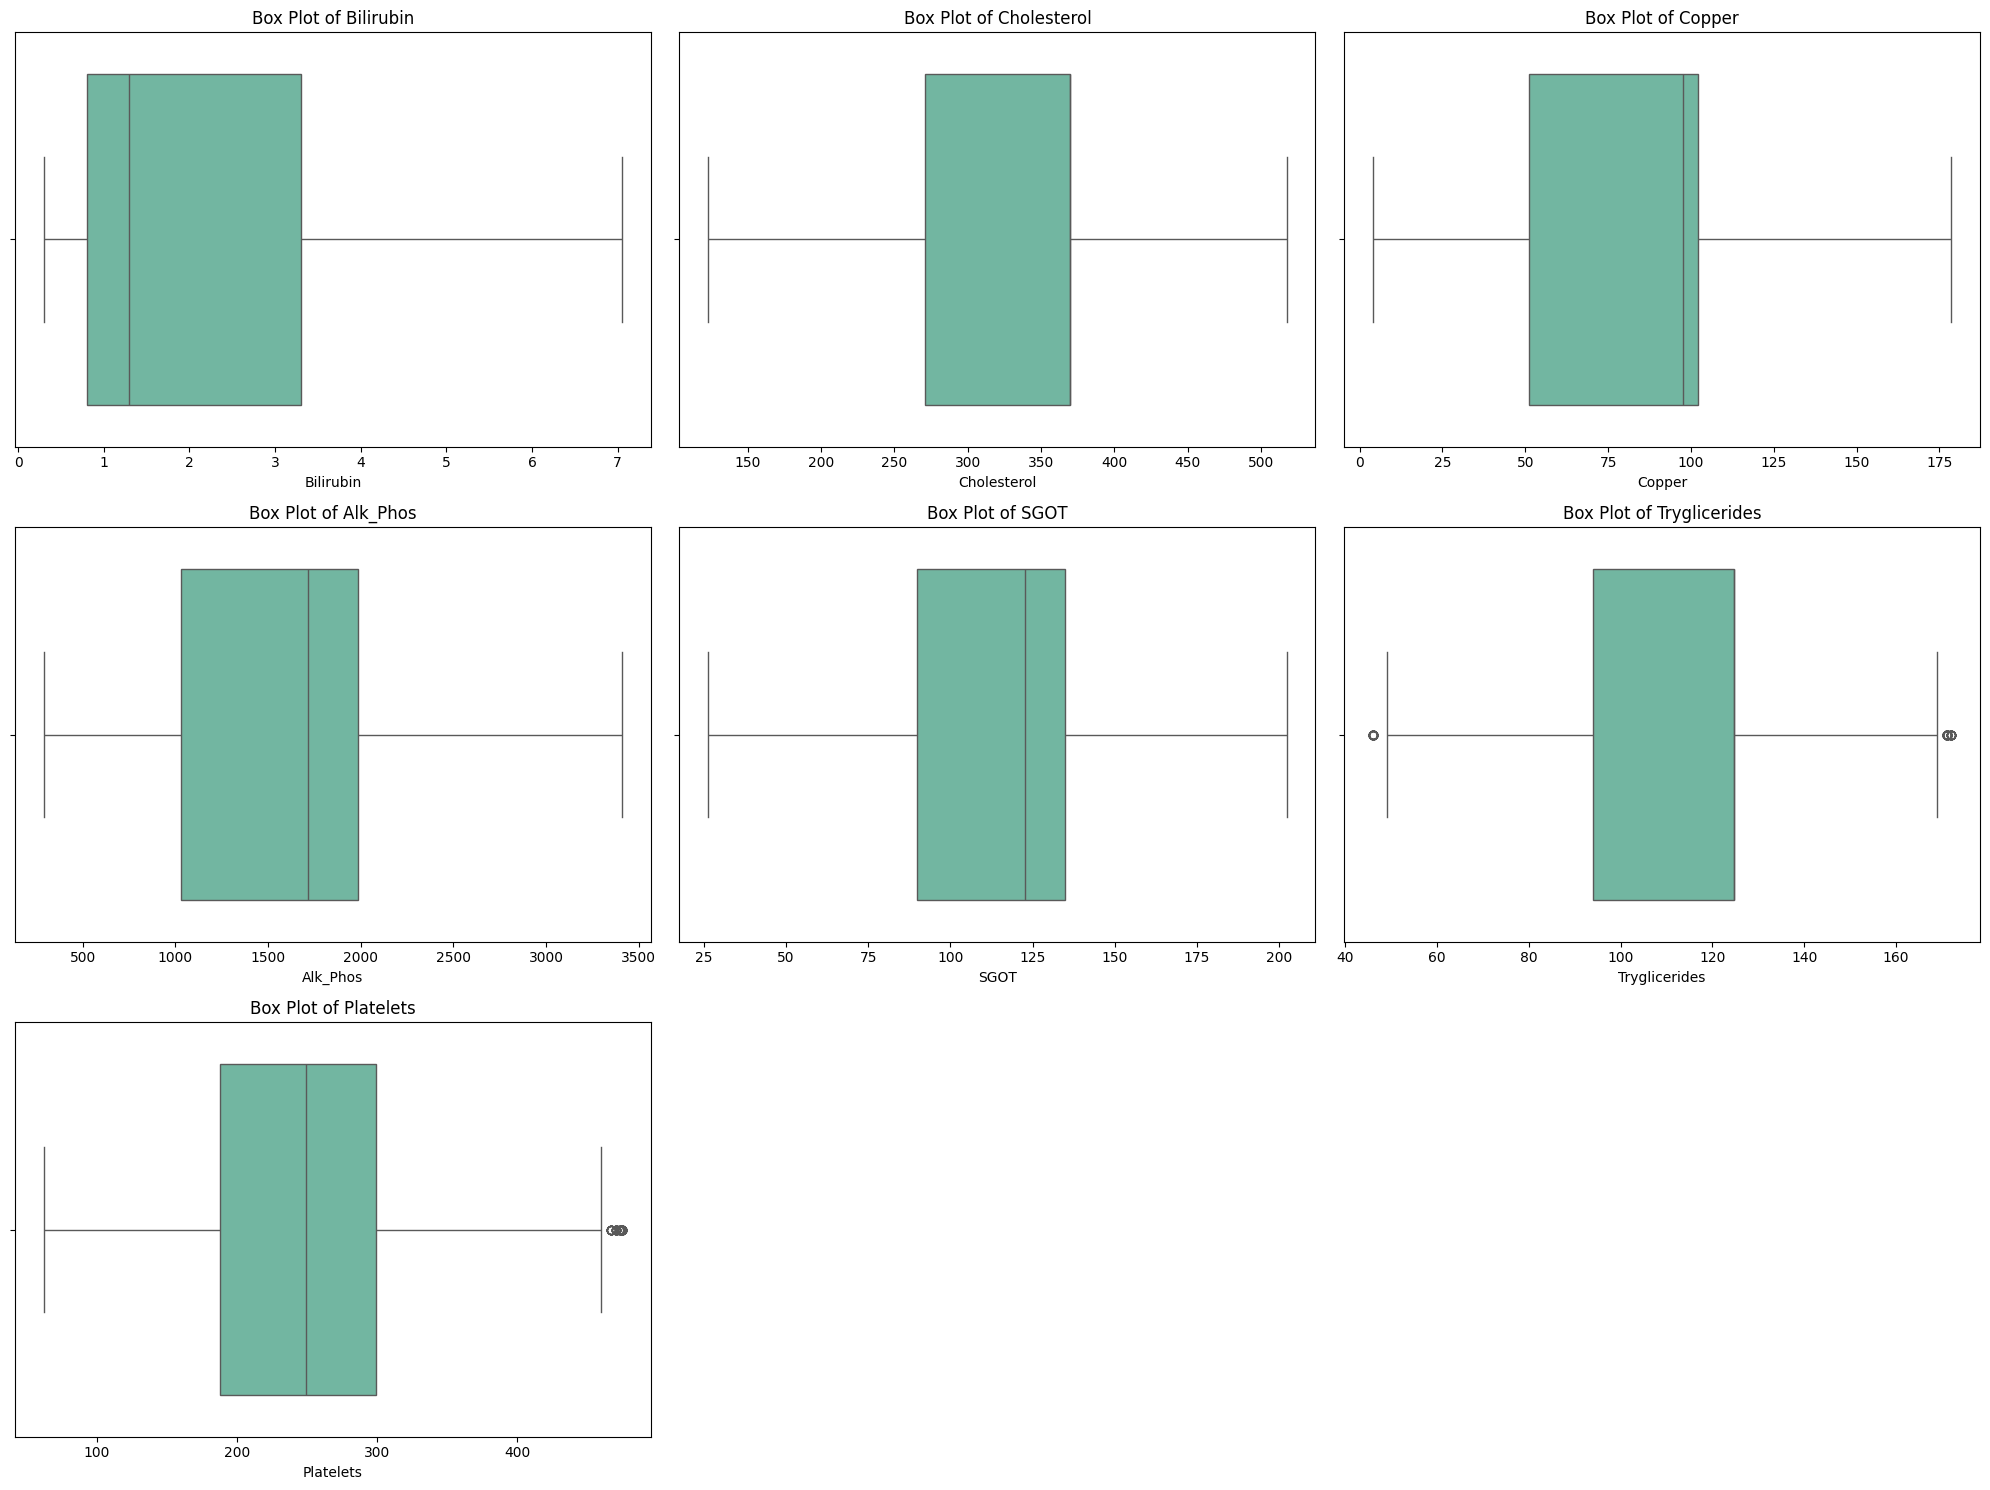

In [25]:
col = ['Bilirubin', 'Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets']

fig, axes= plt.subplots(3,3,figsize=(20, 15))
k=0
for i in range(3):
    for j in range(3):
        if (k< len(col)):
            sns.boxplot(data=data,x=col[k],ax=axes[i,j],palette='Set2')
            axes[i,j].set_title(f'Box Plot of {col[k]}')
            k+=1
        else:
            axes[i, j].axis('off')
plt.tight_layout();

In [26]:
data_processed = data.copy()
print(data_processed.shape)

(9639, 23)


## Chuẩn hóa dữ liệu

In [27]:
y = data['Stage'].copy()
X = data.drop(['Stage'], axis=1).copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
data_scaled = X_scaled_df.copy()
data_scaled['Stage'] = y.values

In [28]:
# mô tả thống kê sau chuẩn hóa
data_scaled.describe()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,...,Tryglicerides,Platelets,Prothrombin,Edema_N,Edema_S,Edema_Y,Status_C,Status_CL,Status_D,Stage
count,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,...,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9639.000000
mean,-5.602370e-17,-1.621739e-17,1.190504e-15,1.474308e-18,-2.985474e-17,3.833201e-17,5.805088e-17,-1.098359e-16,-4.172292e-16,1.794233e-15,...,1.108311e-15,3.781600e-16,2.580039e-17,-4.386066e-17,3.059189e-17,-2.948616e-17,-5.749801e-17,2.027173e-17,-4.865216e-17,2.029152
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,...,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,0.809956
min,-1.709990e+00,-7.427477e-01,-2.390613e+00,-3.550372e-01,-7.231801e-01,-7.953754e-01,-9.712604e-01,-9.586250e-01,-2.466063e+00,-4.018102e+00,...,-2.519544e+00,-2.158519e+00,-1.858317e+00,-2.255045e+00,-3.819202e-01,-1.961161e-01,-1.111015e+00,-2.596957e-01,-7.901696e-01,1.000000
25%,-7.388528e-01,-7.427477e-01,-7.581527e-01,-3.550372e-01,-7.231801e-01,-7.953754e-01,-9.712604e-01,-7.336026e-01,-7.987861e-01,-5.391530e-01,...,-6.914373e-01,-6.993249e-01,-7.736928e-01,4.434502e-01,-3.819202e-01,-1.961161e-01,-1.111015e+00,-2.596957e-01,-7.901696e-01,1.000000
50%,-2.020756e-01,-7.427477e-01,5.412475e-02,-3.550372e-01,-7.231801e-01,-7.953754e-01,-9.712604e-01,-5.085801e-01,3.127320e-01,6.246975e-02,...,4.778706e-01,7.110597e-03,-1.229182e-01,4.434502e-01,-3.819202e-01,-1.961161e-01,9.000782e-01,-2.596957e-01,-7.901696e-01,2.000000
75%,6.282373e-01,1.346352e+00,6.470280e-01,-3.550372e-01,1.382781e+00,1.257268e+00,1.029590e+00,3.915096e-01,3.127320e-01,6.902501e-01,...,4.778706e-01,5.861561e-01,4.193940e-01,4.434502e-01,-3.819202e-01,-1.961161e-01,9.000782e-01,-2.596957e-01,1.265551e+00,3.000000
max,2.637265e+00,1.346352e+00,2.766657e+00,2.816606e+00,1.382781e+00,1.257268e+00,1.029590e+00,2.079178e+00,1.980009e+00,2.992111e+00,...,2.279237e+00,2.624396e+00,7.903302e+00,4.434502e-01,2.618348e+00,5.099020e+00,9.000782e-01,3.850660e+00,1.265551e+00,3.000000


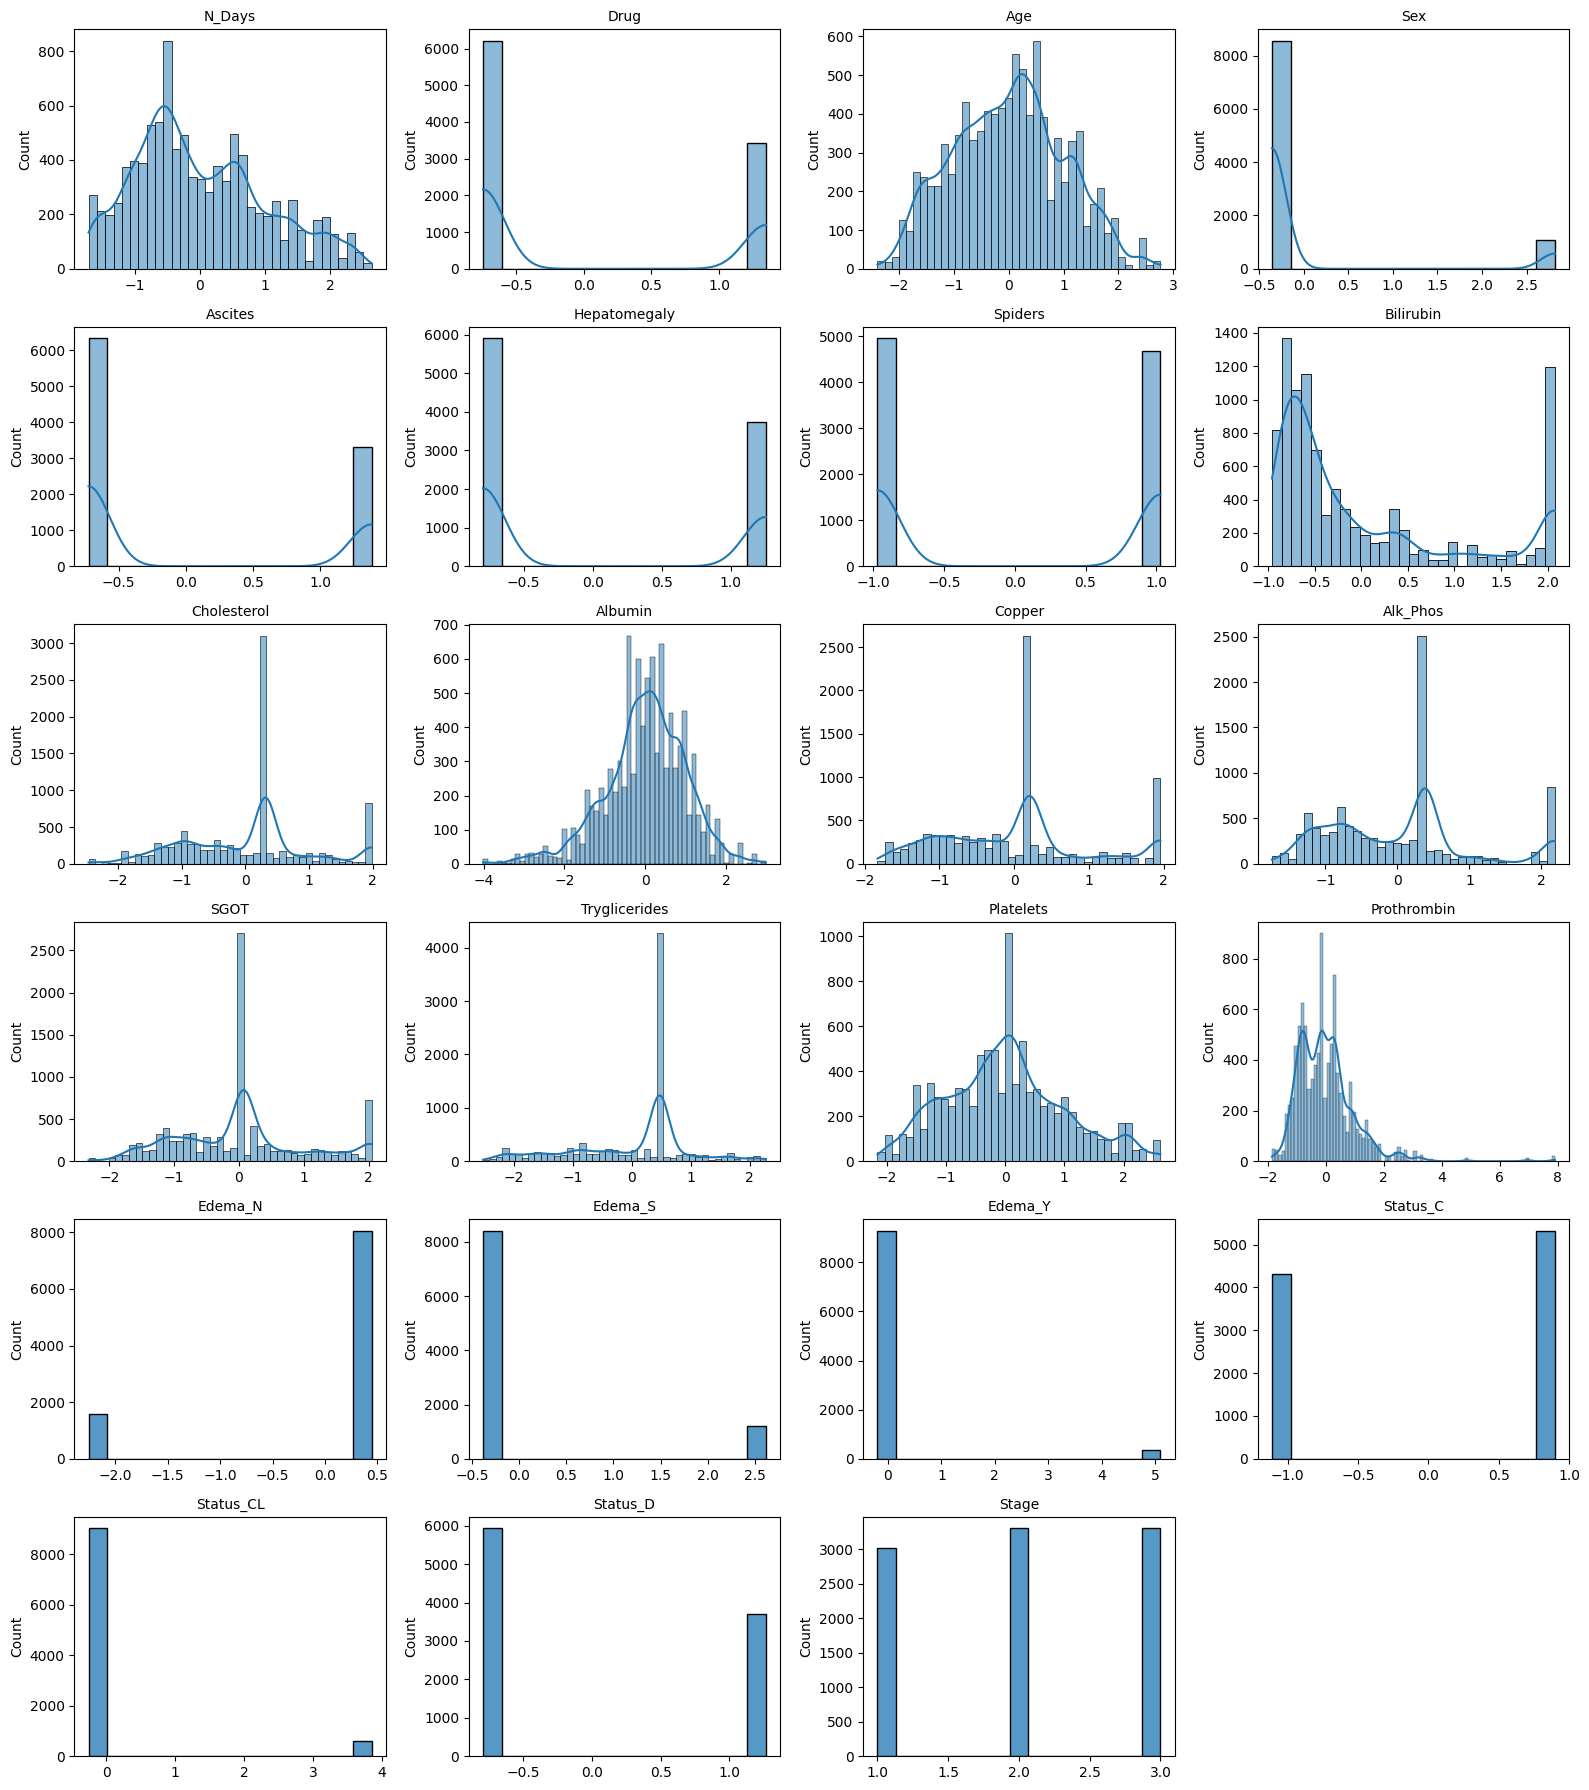

In [29]:
plot_distributions(data_scaled)

# 2.2. Phân tích và trực quan hóa dữ liệu

In [30]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
summary_stats = data_scaled.describe()
summary_stats

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,...,Tryglicerides,Platelets,Prothrombin,Edema_N,Edema_S,Edema_Y,Status_C,Status_CL,Status_D,Stage
count,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,...,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9.639000e+03,9639.000000
mean,-5.602370e-17,-1.621739e-17,1.190504e-15,1.474308e-18,-2.985474e-17,3.833201e-17,5.805088e-17,-1.098359e-16,-4.172292e-16,1.794233e-15,...,1.108311e-15,3.781600e-16,2.580039e-17,-4.386066e-17,3.059189e-17,-2.948616e-17,-5.749801e-17,2.027173e-17,-4.865216e-17,2.029152
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,...,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,0.809956
min,-1.709990e+00,-7.427477e-01,-2.390613e+00,-3.550372e-01,-7.231801e-01,-7.953754e-01,-9.712604e-01,-9.586250e-01,-2.466063e+00,-4.018102e+00,...,-2.519544e+00,-2.158519e+00,-1.858317e+00,-2.255045e+00,-3.819202e-01,-1.961161e-01,-1.111015e+00,-2.596957e-01,-7.901696e-01,1.000000
25%,-7.388528e-01,-7.427477e-01,-7.581527e-01,-3.550372e-01,-7.231801e-01,-7.953754e-01,-9.712604e-01,-7.336026e-01,-7.987861e-01,-5.391530e-01,...,-6.914373e-01,-6.993249e-01,-7.736928e-01,4.434502e-01,-3.819202e-01,-1.961161e-01,-1.111015e+00,-2.596957e-01,-7.901696e-01,1.000000
50%,-2.020756e-01,-7.427477e-01,5.412475e-02,-3.550372e-01,-7.231801e-01,-7.953754e-01,-9.712604e-01,-5.085801e-01,3.127320e-01,6.246975e-02,...,4.778706e-01,7.110597e-03,-1.229182e-01,4.434502e-01,-3.819202e-01,-1.961161e-01,9.000782e-01,-2.596957e-01,-7.901696e-01,2.000000
75%,6.282373e-01,1.346352e+00,6.470280e-01,-3.550372e-01,1.382781e+00,1.257268e+00,1.029590e+00,3.915096e-01,3.127320e-01,6.902501e-01,...,4.778706e-01,5.861561e-01,4.193940e-01,4.434502e-01,-3.819202e-01,-1.961161e-01,9.000782e-01,-2.596957e-01,1.265551e+00,3.000000
max,2.637265e+00,1.346352e+00,2.766657e+00,2.816606e+00,1.382781e+00,1.257268e+00,1.029590e+00,2.079178e+00,1.980009e+00,2.992111e+00,...,2.279237e+00,2.624396e+00,7.903302e+00,4.434502e-01,2.618348e+00,5.099020e+00,9.000782e-01,3.850660e+00,1.265551e+00,3.000000


In [32]:
pca = PCA(n_components=6)

pca_result = pca.fit_transform(data_scaled.drop('Stage', axis=1))

pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(6)])
pca_df['Stage'] = data_scaled['Stage'].values

sns.pairplot(pca_df, vars=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], hue='Stage', palette='Set2')
plt.suptitle("PCA scatter plots theo cặp 2 thành phần", y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [33]:
explained_variance = pca.explained_variance_ratio_
for i, ev in enumerate(explained_variance, 1):
    print(f"PC{i} giải thích: {ev:.4f} ({ev*100:.2f}%) phương sai")
total = np.sum(explained_variance)
print(f"\nTổng phương sai giữ lại bởi {len(explained_variance)} thành phần đầu tiên: {total:.4f} ({total*100:.2f}%)")


PC1 giải thích: 0.1867 (18.67%) phương sai
PC2 giải thích: 0.0974 (9.74%) phương sai
PC3 giải thích: 0.0894 (8.94%) phương sai
PC4 giải thích: 0.0654 (6.54%) phương sai
PC5 giải thích: 0.0570 (5.70%) phương sai
PC6 giải thích: 0.0528 (5.28%) phương sai

Tổng phương sai giữ lại bởi 6 thành phần đầu tiên: 0.5487 (54.87%)


<Axes: xlabel='LD1', ylabel='LD2'>

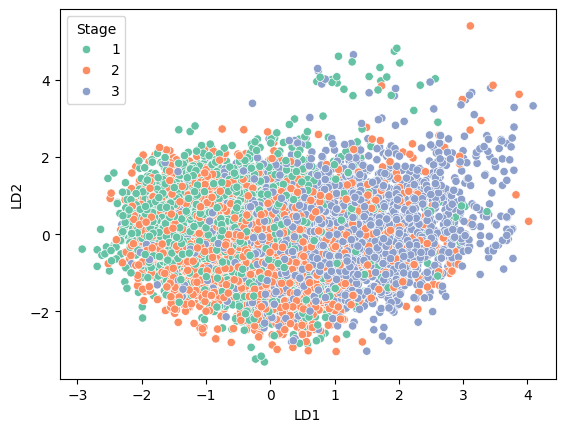

In [34]:
# LDA
X = data_scaled.drop('Stage', axis=1)
y = data_scaled['Stage']

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df['Stage'] = y

sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue='Stage', palette='Set2')

In [35]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
discriminability_ratio = lda.explained_variance_ratio_
for i, var in enumerate(discriminability_ratio):
    print(f"LD{i+1}: {var:.4f} ({var*100:.2f}%)")
total_ratio = np.sum(discriminability_ratio)
print(f"Tổng tỉ lệ phân biệt được giữ lại: {total_ratio:.4f} ({total_ratio*100:.2f}%)")

LD1: 0.9126 (91.26%)
LD2: 0.0874 (8.74%)
Tổng tỉ lệ phân biệt được giữ lại: 1.0000 (100.00%)


# 2.3. Phân cụm dữ liệu

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from sklearn.metrics import silhouette_score

## K-Means

In [ ]:
X = data_scaled.drop(columns=['Stage'])
y = data_scaled['Stage']

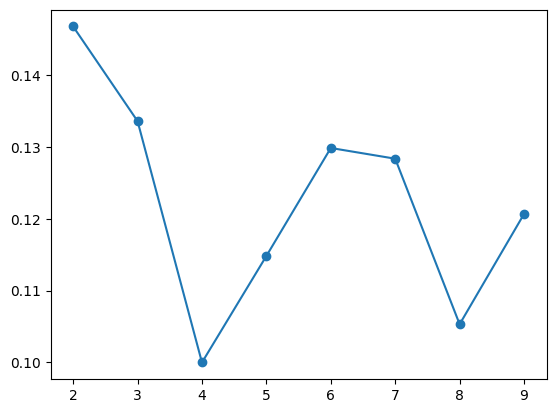

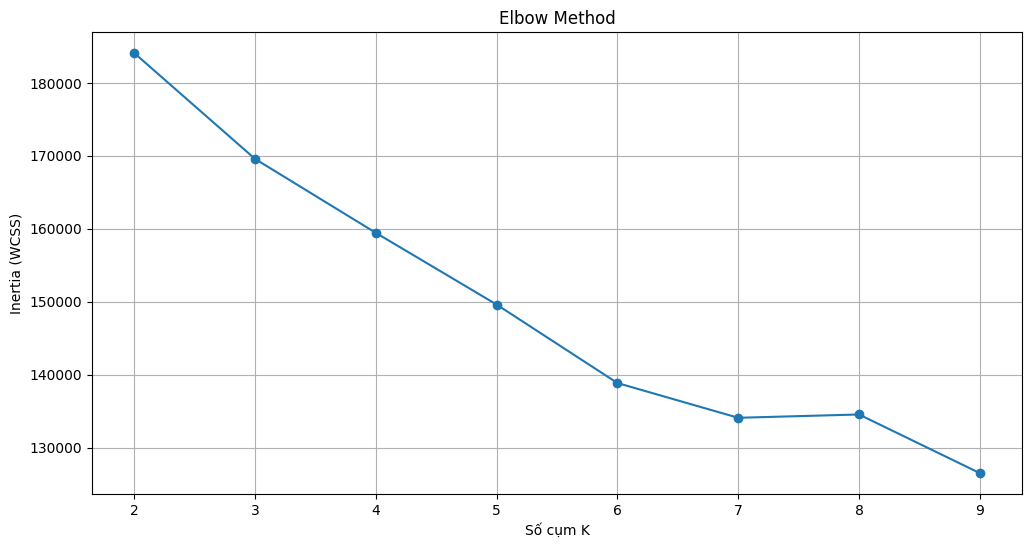

In [ ]:
# Elbow method
inertias = []
K_range = range(2, 10)

sil_scores = [silhouette_score(X, KMeans(n_clusters=k, random_state=42).fit_predict(X)) for k in K_range]
plt.plot(K_range, sil_scores, 'o-')

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(K_range, inertias, 'o-')
plt.xlabel('Số cụm K')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

Nhìn vào đồ thị trên, ta có thể thấy được bắt đầu ở điểm K = 6 trở đi thì WCSS không còn giảm quá mạnh nữa mà có xu hướng thoải hơn.

In [ ]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

data['Cluster'] = clusters

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, clusters)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.1299


Với điểm Silhouette như trên, ta có thể thấy được mức độ phân tách giữa các cụm là rất kém. Điều này cho thấy rằng dữ liệu có thể không có cấu trúc phân cụm rõ ràng theo các đặc trưng đầu vào hiện tại.

Stage           1         2         3
Cluster                              
0        0.230925  0.332257  0.436819
1        0.151730  0.284827  0.563443
2        0.427801  0.375075  0.197124
3        0.391830  0.356157  0.252014
4        0.254153  0.405316  0.340532
5        0.056022  0.137255  0.806723



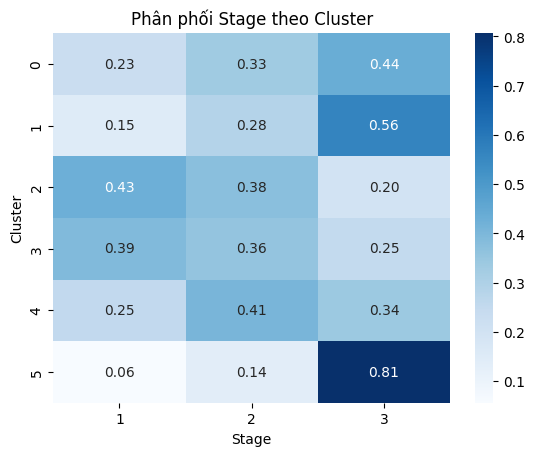

In [ ]:
ct = pd.crosstab(data['Cluster'], data['Stage'], normalize='index')
print(ct)

print()

sns.heatmap(ct, annot=True, cmap='Blues', fmt=".2f")
plt.title("Phân phối Stage theo Cluster")
plt.ylabel("Cluster")
plt.xlabel("Stage")
plt.show()

Từ bảng phân phối Stage theo Cluster, ta có thể thấy được các cụm này chưa thể hiện được sự phân biệt hoàn toàn rõ rệt theo Stage, cho thấy dữ liệu đầu vào chưa đủ mạnh để phân cụm rõ ràng.

In [ ]:
def cluster_entropy(cluster_series):
  return cluster_series.value_counts(normalize=True).pipe(lambda x: entropy(x, base=2))

cluster_entropies = data.groupby('Cluster')['Stage'].apply(cluster_entropy)
print("Entropy của các cụm: ") # (càng thấp càng 'tinh khiết')
print(cluster_entropies)

Entropy của các cụm: 
Cluster
0    1.538408
1    1.395170
2    1.516515
3    1.561213
4    1.559577
5    0.876145
Name: Stage, dtype: float64


Như vậy từ những kết quả thu được ở trên, ta có thể thu ra được nhận xét:

- Mối quan hệ giữa các dữ liệu đầu vào trong các cụm: Với kết quả trả ra của Silhouette Score cho thấy rằng các đặc trưng đầu vào chưa tạo ra sự phân tách mạnh mẽ để nhóm dữ liệu thành các cụm tự nhiên.

- Dựa vào bảng phân phối Stage theo Cluster và Entropy từng cụm, ta có thể thấy được mặc dù kết quả có những cụm thiên về 1 nhãn nhất định nhưng chúng vẫn bị trộn lẫn cho thấy các cụm chưa thực sự đại diện rõ cho từng Stage.

--> Dữ liệu đầu vào chưa thực sự mạnh để phân cụm rõ ràng.

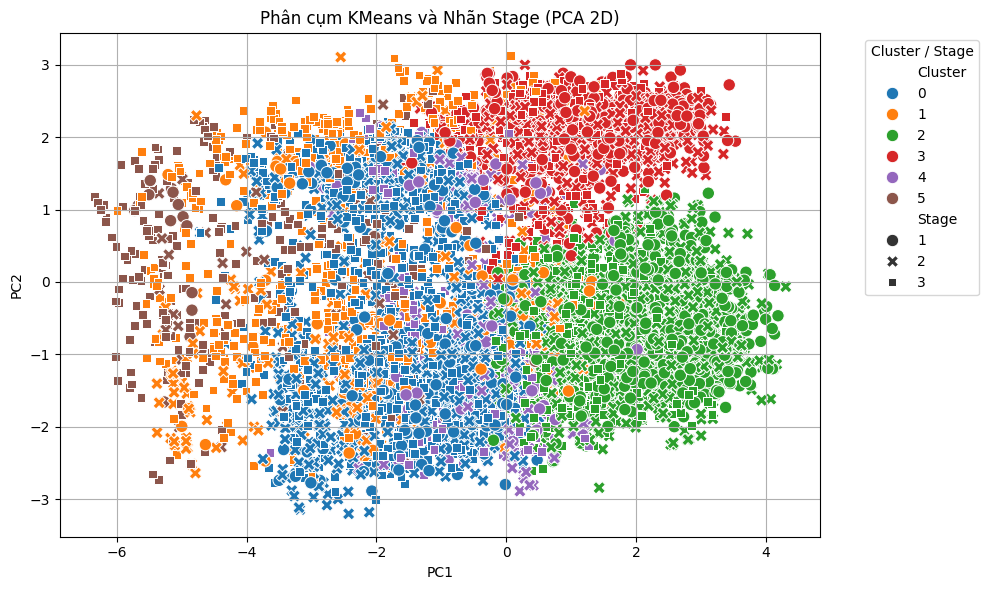

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

plot_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': clusters,
    'Stage': y.astype(str)
})

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=plot_df,
    x='PC1', y='PC2',
    hue='Cluster',
    style='Stage',
    palette='tab10',
    s=80
)

plt.title("Phân cụm KMeans và Nhãn Stage (PCA 2D)")
plt.legend(title='Cluster / Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

Như vậy có thể thấy được rằng dữ liệu không đủ mạnh để có thể phân cụm rõ ràng theo nhãn.

# 2.4. Phân loại

## a) Áp dụng 3 phương pháp phân loại

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import numpy as np

### Thực hiện với dữ liệu gốc

In [ ]:
X = data_processed.drop(columns=['Stage'])
y = data_processed['Stage']

### Chọn tham số cho mô hình KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
def run_gridsearch_knn(X, y, test_size=0.2, cv=5, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
        'weights': ['distance'],
        'metric': ['manhattan']
    }

    knn = KNeighborsClassifier()

    # Chạy GridSearchCV
    grid_search = GridSearchCV(
        estimator=knn,
        param_grid=param_grid,
        cv=cv,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )

    grid_search.fit(X_train_scaled, y_train)

    results_df = pd.DataFrame(grid_search.cv_results_)
    results_table = results_df[['param_n_neighbors', 'param_weights', 'param_metric',
                                'rank_test_score']].copy()

    train_accuracies = []
    test_accuracies = []

    for params in grid_search.cv_results_['params']:
        knn = KNeighborsClassifier(**params)
        knn.fit(X_train_scaled, y_train)

        y_pred_train = knn.predict(X_train_scaled)
        train_acc = accuracy_score(y_train, y_pred_train)
        train_accuracies.append(train_acc)

        y_pred_test = knn.predict(X_test_scaled)
        test_acc = accuracy_score(y_test, y_pred_test)
        test_accuracies.append(test_acc)

    results_table['train_accuracy'] = train_accuracies
    results_table['test_accuracy'] = test_accuracies

    results_table = results_table.sort_values(by='rank_test_score')

    results_table['train_accuracy'] = results_table['train_accuracy'].round(4)
    results_table['test_accuracy'] = results_table['test_accuracy'].round(4)

    print("\n=== Bảng kết quả GridSearchCV ===")
    print(results_table.to_string(index=False))

    print("\n=== Tham số tốt nhất ===")
    print(grid_search.best_params_)
    print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

    best_model = grid_search.best_estimator_
    y_pred_test = best_model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Test Accuracy (Best Model): {test_accuracy:.4f}")

    return grid_search.best_params_, results_table

best_params, grid_results = run_gridsearch_knn(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

=== Bảng kết quả GridSearchCV ===
 param_n_neighbors param_weights param_metric  rank_test_score  train_accuracy  test_accuracy
                 7      distance    manhattan                1          0.9912         0.7894
                 5      distance    manhattan                2          0.9912         0.7925
                 9      distance    manhattan                3          0.9912         0.7930
                11      distance    manhattan                4          0.9912         0.7920
                 3      distance    manhattan                5          0.9912         0.7915
                13      distance    manhattan                6          0.9912         0.7884
                15      distance    manhattan                7          0.9912         0.7801
                17      distance    manhattan                8          0.9912         0.7853
                19      distance    manhattan              

#### KNN

In [ ]:
def run_KNN(X, y, test_size, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Khởi tạo mô hình KNN với tham số tối ưu từ GridSearchCV
    model = KNeighborsClassifier(
        n_neighbors=7,          # Số láng giềng tối ưu
        weights='distance',     # Trọng số dựa trên khoảng cách
        metric='manhattan'      # Khoảng cách Manhattan (tương đương Minkowski với p=1)
    )
    model.fit(X_train, y_train)

    # Dự đoán trên train và test
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Đánh giá
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    print(f"\n (test_size={test_size})")

    print(f"\nTrain Accuracy: {acc_train:.4f}")
    print(f"Test Accuracy: {acc_test:.4f}")

    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_pred_test))
    report = classification_report(y_test, y_pred_test, output_dict=True)

    # Trực quan hóa
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix (test_size={test_size})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


 (test_size=0.2)

Train Accuracy: 0.9912
Test Accuracy: 0.7894

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.77      0.79      0.78       605
           2       0.75      0.75      0.75       662
           3       0.85      0.83      0.84       661

    accuracy                           0.79      1928
   macro avg       0.79      0.79      0.79      1928
weighted avg       0.79      0.79      0.79      1928



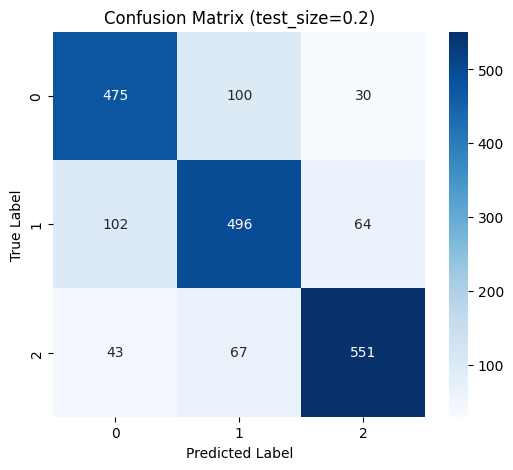


 (test_size=0.3)

Train Accuracy: 0.9918
Test Accuracy: 0.7994

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.77      0.79      0.78       908
           2       0.76      0.77      0.77       992
           3       0.86      0.84      0.85       992

    accuracy                           0.80      2892
   macro avg       0.80      0.80      0.80      2892
weighted avg       0.80      0.80      0.80      2892



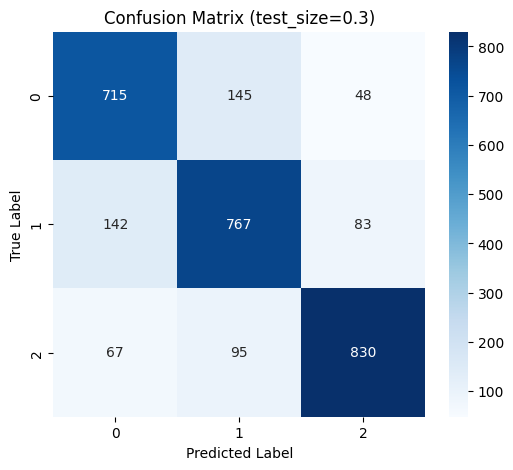


 (test_size=0.4)

Train Accuracy: 0.9939
Test Accuracy: 0.7884

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.77      0.77      0.77      1210
           2       0.75      0.76      0.76      1323
           3       0.85      0.84      0.84      1323

    accuracy                           0.79      3856
   macro avg       0.79      0.79      0.79      3856
weighted avg       0.79      0.79      0.79      3856



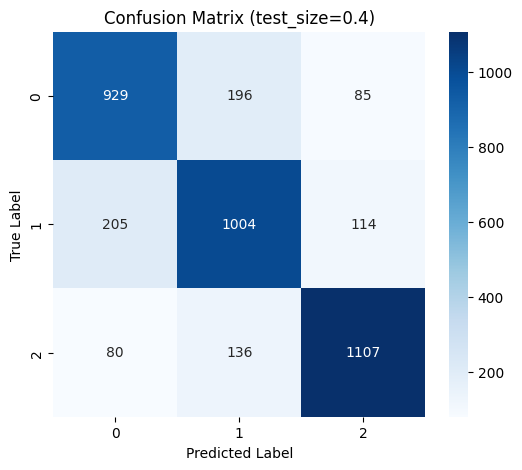

In [ ]:
run_KNN(X, y, test_size=0.2)
run_KNN(X, y, test_size=0.3)
run_KNN(X, y, test_size=0.4)

### Tham số cho MLP

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,), (32,), (64,), (128,), (32, 32), (64, 64), (128, 128)],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

activation = 'relu'
solver = 'adam'
max_iter = 1000
random_state = 42

results = []

for params in ParameterGrid(param_grid):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train_raw)
    X_test = scaler.transform(X_test_raw)
    mlp = MLPClassifier(
        activation=activation,
        solver=solver,
        max_iter=max_iter,
        random_state=random_state,
        **params
    )
    mlp.fit(X_train, y_train)
    y_pred_train = mlp.predict(X_train)
    y_pred_test = mlp.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    results.append({
        **params,
        'Accuracy Train': acc_train,
        'Accuracy Test': acc_test
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='Accuracy Test', ascending=False).reset_index(drop=True)
df_results.head(20)

,alpha,hidden_layer_sizes,learning_rate_init,Accuracy Train,Accuracy Test
0,0.10000,"(128, 128)",0.001,0.975619,0.755187
1,0.00001,"(128, 128)",0.001,0.984049,0.742220
2,0.00010,"(128, 128)",0.010,0.968098,0.740664
3,0.00001,"(128, 128)",0.010,0.979510,0.738589
4,0.00100,"(200,)",0.001,0.952406,0.738071
5,0.10000,"(128, 128)",0.010,0.947867,0.738071
6,0.01000,"(128, 128)",0.001,0.975230,0.738071
7,0.00001,"(200,)",0.001,0.956556,0.737552
8,0.00001,"(200,)",0.010,0.926598,0.737552
9,0.00001,"(128,)",0.010,0.905589,0.734440


#### MLP

In [ ]:
def run_MLP(X, y, test_size , random_state=42):
    # Chia dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Khởi tạo mô hình MLP
    mlp = MLPClassifier(hidden_layer_sizes=(100, ),
                        activation='relu',
                        solver='adam',
                        alpha=0.001,
                        max_iter=1000,
                        random_state=42)

    # Huấn luyện mô hình
    mlp.fit(X_train, y_train)

    # Dự đoán trên train và test
    y_pred_train = mlp.predict(X_train)
    y_pred_test = mlp.predict(X_test)

    # Đánh giá
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    print(f"\n (test_size={test_size})")

    print(f"\nTrain Accuracy: {acc_train:.4f}")
    print(f"Test Accuracy: {acc_test:.4f}")

    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_pred_test))
    report = classification_report(y_test, y_pred_test, output_dict=True)

    # Trực quan hóa
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix (test_size={test_size})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


 (test_size=0.2)

Train Accuracy: 0.8688
Test Accuracy: 0.7007

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.69      0.69      0.69       605
           2       0.65      0.65      0.65       662
           3       0.76      0.76      0.76       661

    accuracy                           0.70      1928
   macro avg       0.70      0.70      0.70      1928
weighted avg       0.70      0.70      0.70      1928



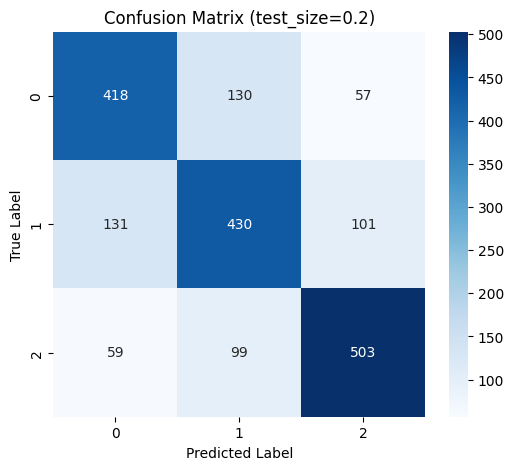


 (test_size=0.3)

Train Accuracy: 0.8711
Test Accuracy: 0.7168

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.69      0.72      0.70       908
           2       0.68      0.64      0.66       992
           3       0.78      0.79      0.78       992

    accuracy                           0.72      2892
   macro avg       0.72      0.72      0.72      2892
weighted avg       0.72      0.72      0.72      2892



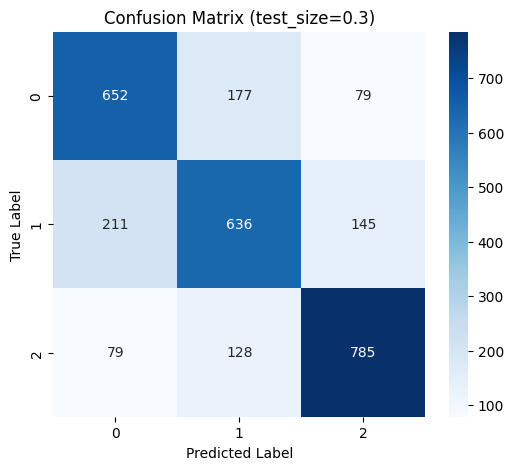


 (test_size=0.4)

Train Accuracy: 0.9092
Test Accuracy: 0.6948

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.67      0.66      0.66      1210
           2       0.65      0.66      0.66      1323
           3       0.76      0.77      0.76      1323

    accuracy                           0.69      3856
   macro avg       0.69      0.69      0.69      3856
weighted avg       0.69      0.69      0.69      3856



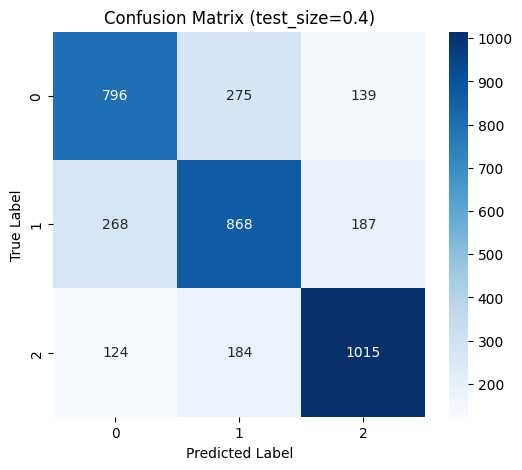

In [ ]:
run_MLP(X, y, test_size=0.2)
run_MLP(X, y, test_size=0.3)
run_MLP(X, y, test_size=0.4)

#### SVM

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import  GridSearchCV

In [ ]:
# Tỉ lệ train-test
split_ratios = {
    "4:1": 0.2,
    "7:3": 0.3,
    "3:2": 0.4
}

In [ ]:
# Hàm vẽ confusion matrix
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Lưu kết quả
results = {}

In [ ]:
param_grid_sigmoid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'coef0': [0.0, 0.5, 1.0]
}

In [ ]:
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

In [ ]:
param_grid_linear = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:
param_grid_linsvc = {'C': [0.01, 0.1, 1, 10, 100]}

In [ ]:
param_grid_poly = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'gamma': ['scale', 0.01, 0.1, 1],
    'coef0': [0.0, 0.5, 1.0]
}

In [ ]:
# Các mô hình SVM
models = {
    "Hard/Soft Margin SVM ": GridSearchCV(SVC(kernel= 'linear',max_iter=10000), param_grid_linear, cv=5, scoring='accuracy', n_jobs=-1),

    "Multi-class SVM ": GridSearchCV(LinearSVC(max_iter=10000), param_grid_linsvc, cv=5, scoring='accuracy', n_jobs=-1),

    "Polynomial Kernel SVM": GridSearchCV(SVC(kernel='poly', max_iter=10000), param_grid_poly, cv=5, scoring='accuracy', n_jobs=-1),

    "Sigmoid Kernel SVM": GridSearchCV(SVC(kernel='sigmoid'), param_grid_sigmoid, cv=5, scoring='accuracy', n_jobs=-1),

    "RBF Kernel SVM": GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5, scoring='accuracy', n_jobs=-1),
}

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



=== Hard/Soft Margin SVM  (4:1 split) ===
Train Accuracy: 0.5653
Test Accuracy: 0.5555
Best Params:
  C: 0.1
              precision    recall  f1-score   support

           1       0.51      0.61      0.56       605
           2       0.49      0.37      0.42       662
           3       0.64      0.69      0.67       661

    accuracy                           0.56      1928
   macro avg       0.55      0.56      0.55      1928
weighted avg       0.55      0.56      0.55      1928



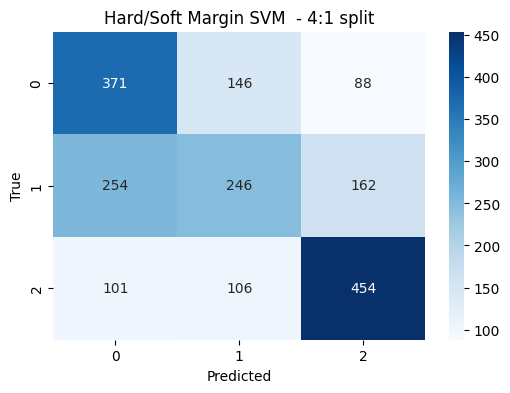


=== Multi-class SVM  (4:1 split) ===
Train Accuracy: 0.5606
Test Accuracy: 0.5493
Best Params:
  C: 0.1
              precision    recall  f1-score   support

           1       0.53      0.57      0.55       605
           2       0.50      0.36      0.42       662
           3       0.60      0.72      0.65       661

    accuracy                           0.55      1928
   macro avg       0.54      0.55      0.54      1928
weighted avg       0.54      0.55      0.54      1928



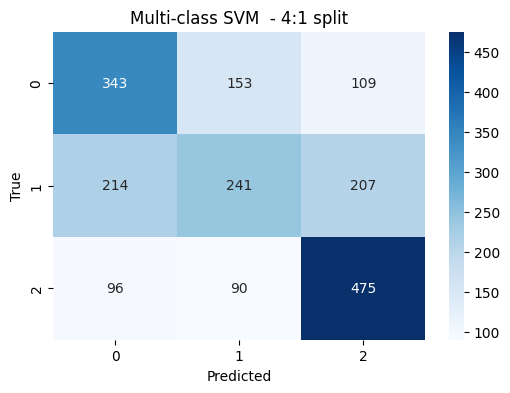

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



=== Polynomial Kernel SVM (4:1 split) ===
Train Accuracy: 0.8611
Test Accuracy: 0.7158
Best Params:
  C: 0.1
  gamma: 0.1
  degree: 4
  coef0: 0.5
              precision    recall  f1-score   support

           1       0.69      0.68      0.68       605
           2       0.65      0.69      0.67       662
           3       0.81      0.77      0.79       661

    accuracy                           0.72      1928
   macro avg       0.72      0.71      0.72      1928
weighted avg       0.72      0.72      0.72      1928



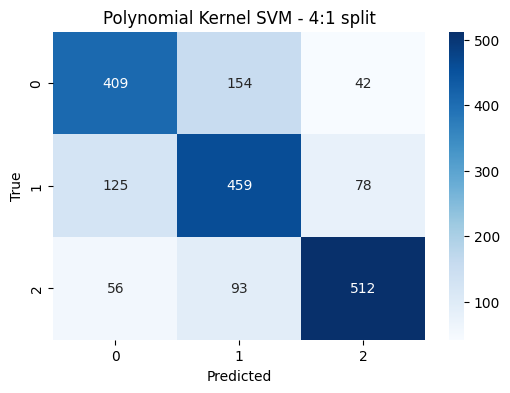


=== Sigmoid Kernel SVM (4:1 split) ===
Train Accuracy: 0.5636
Test Accuracy: 0.5539
Best Params:
  C: 10
  gamma: 0.001
  coef0: 0.0
              precision    recall  f1-score   support

           1       0.51      0.61      0.56       605
           2       0.49      0.37      0.42       662
           3       0.65      0.69      0.67       661

    accuracy                           0.55      1928
   macro avg       0.55      0.56      0.55      1928
weighted avg       0.55      0.55      0.55      1928



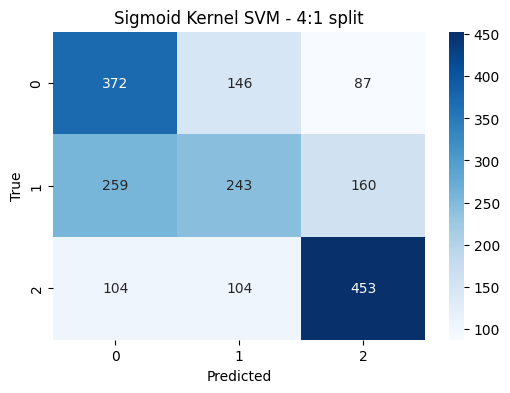


=== RBF Kernel SVM (4:1 split) ===
Train Accuracy: 0.9378
Test Accuracy: 0.7422
Best Params:
  C: 10
  gamma: 0.1
              precision    recall  f1-score   support

           1       0.74      0.70      0.72       605
           2       0.69      0.72      0.70       662
           3       0.80      0.81      0.81       661

    accuracy                           0.74      1928
   macro avg       0.74      0.74      0.74      1928
weighted avg       0.74      0.74      0.74      1928



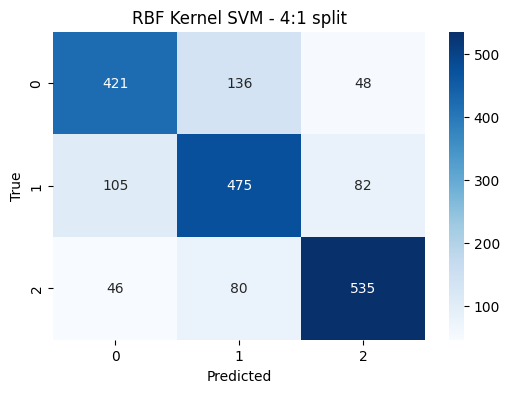


=== Hard/Soft Margin SVM  (7:3 split) ===
Train Accuracy: 0.5610
Test Accuracy: 0.5533
Best Params:
  C: 0.01
              precision    recall  f1-score   support

           1       0.49      0.62      0.55       908
           2       0.50      0.36      0.42       992
           3       0.65      0.68      0.67       992

    accuracy                           0.55      2892
   macro avg       0.55      0.56      0.55      2892
weighted avg       0.55      0.55      0.55      2892



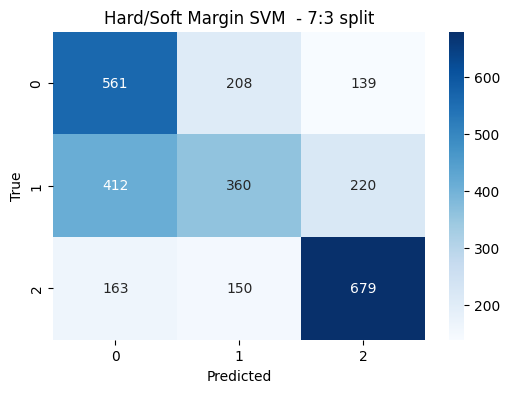


=== Multi-class SVM  (7:3 split) ===
Train Accuracy: 0.5598
Test Accuracy: 0.5550
Best Params:
  C: 0.01
              precision    recall  f1-score   support

           1       0.52      0.58      0.55       908
           2       0.51      0.36      0.42       992
           3       0.61      0.73      0.66       992

    accuracy                           0.55      2892
   macro avg       0.55      0.56      0.54      2892
weighted avg       0.55      0.55      0.54      2892



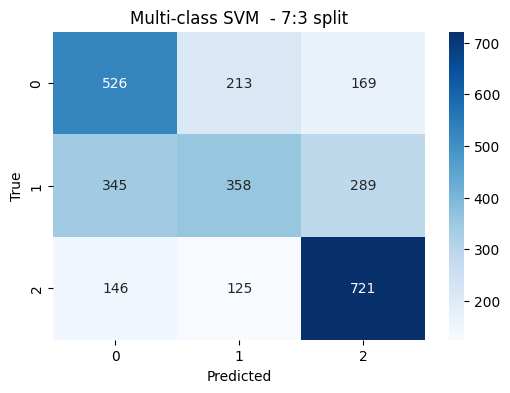

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



=== Polynomial Kernel SVM (7:3 split) ===
Train Accuracy: 0.8724
Test Accuracy: 0.7123
Best Params:
  C: 0.1
  gamma: 0.1
  degree: 4
  coef0: 1.0
              precision    recall  f1-score   support

           1       0.67      0.69      0.68       908
           2       0.67      0.68      0.68       992
           3       0.80      0.77      0.78       992

    accuracy                           0.71      2892
   macro avg       0.71      0.71      0.71      2892
weighted avg       0.71      0.71      0.71      2892



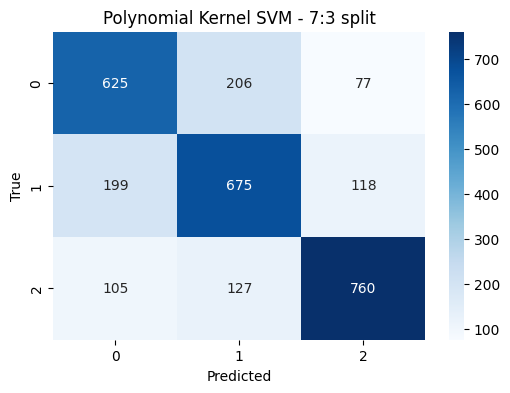


=== Sigmoid Kernel SVM (7:3 split) ===
Train Accuracy: 0.5611
Test Accuracy: 0.5536
Best Params:
  C: 10
  gamma: 0.001
  coef0: 0.0
              precision    recall  f1-score   support

           1       0.49      0.62      0.55       908
           2       0.50      0.36      0.42       992
           3       0.65      0.68      0.67       992

    accuracy                           0.55      2892
   macro avg       0.55      0.56      0.55      2892
weighted avg       0.55      0.55      0.55      2892



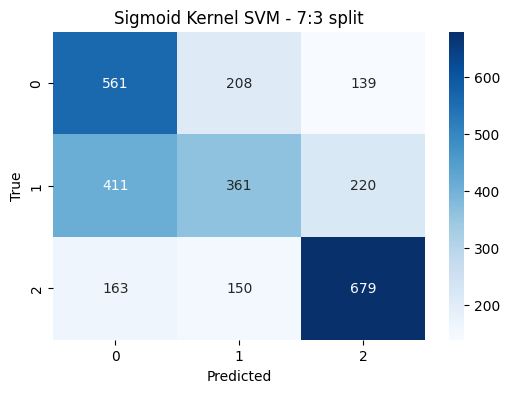


=== RBF Kernel SVM (7:3 split) ===
Train Accuracy: 0.9383
Test Accuracy: 0.7317
Best Params:
  C: 10
  gamma: 0.1
              precision    recall  f1-score   support

           1       0.70      0.70      0.70       908
           2       0.69      0.70      0.70       992
           3       0.80      0.80      0.80       992

    accuracy                           0.73      2892
   macro avg       0.73      0.73      0.73      2892
weighted avg       0.73      0.73      0.73      2892



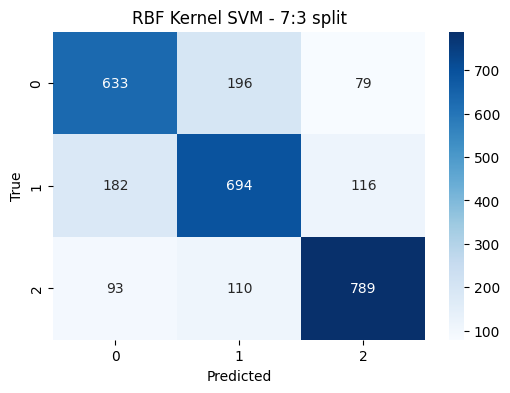


=== Hard/Soft Margin SVM  (3:2 split) ===
Train Accuracy: 0.5629
Test Accuracy: 0.5511
Best Params:
  C: 0.01
              precision    recall  f1-score   support

           1       0.49      0.63      0.55      1210
           2       0.50      0.35      0.41      1323
           3       0.65      0.68      0.67      1323

    accuracy                           0.55      3856
   macro avg       0.55      0.55      0.54      3856
weighted avg       0.55      0.55      0.54      3856



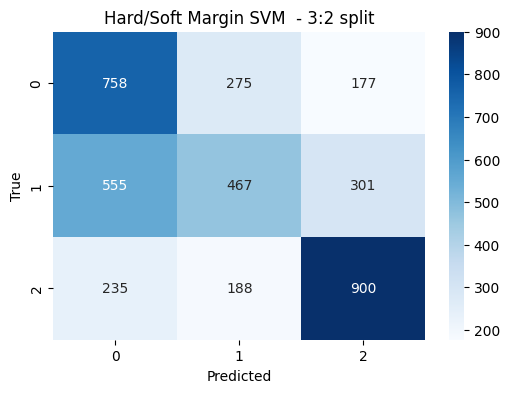


=== Multi-class SVM  (3:2 split) ===
Train Accuracy: 0.5570
Test Accuracy: 0.5609
Best Params:
  C: 0.1
              precision    recall  f1-score   support

           1       0.52      0.59      0.55      1210
           2       0.52      0.37      0.43      1323
           3       0.62      0.73      0.67      1323

    accuracy                           0.56      3856
   macro avg       0.55      0.56      0.55      3856
weighted avg       0.56      0.56      0.55      3856



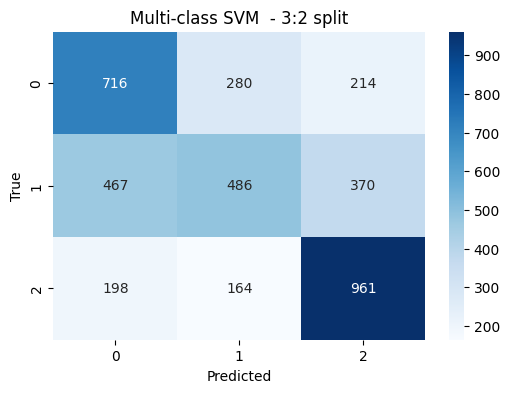

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



=== Polynomial Kernel SVM (3:2 split) ===
Train Accuracy: 0.9231
Test Accuracy: 0.6994
Best Params:
  C: 10
  gamma: scale
  degree: 4
  coef0: 0.5
              precision    recall  f1-score   support

           1       0.65      0.67      0.66      1210
           2       0.66      0.69      0.67      1323
           3       0.79      0.74      0.77      1323

    accuracy                           0.70      3856
   macro avg       0.70      0.70      0.70      3856
weighted avg       0.70      0.70      0.70      3856



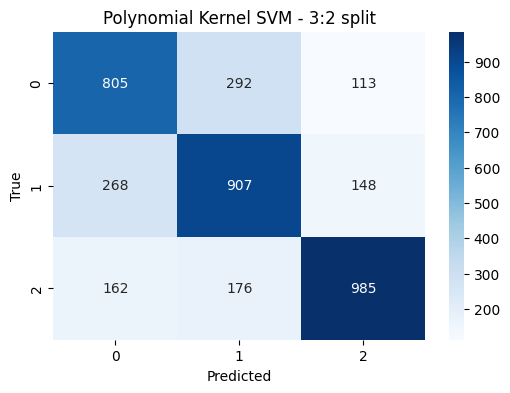


=== Sigmoid Kernel SVM (3:2 split) ===
Train Accuracy: 0.5629
Test Accuracy: 0.5511
Best Params:
  C: 10
  gamma: 0.001
  coef0: 0.0
              precision    recall  f1-score   support

           1       0.49      0.63      0.55      1210
           2       0.50      0.35      0.41      1323
           3       0.65      0.68      0.67      1323

    accuracy                           0.55      3856
   macro avg       0.55      0.55      0.54      3856
weighted avg       0.55      0.55      0.54      3856



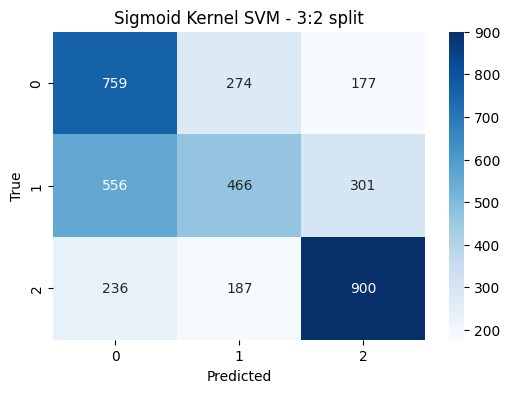


=== RBF Kernel SVM (3:2 split) ===
Train Accuracy: 0.9435
Test Accuracy: 0.7326
Best Params:
  C: 10
  gamma: 0.1
              precision    recall  f1-score   support

           1       0.69      0.70      0.70      1210
           2       0.70      0.70      0.70      1323
           3       0.80      0.79      0.80      1323

    accuracy                           0.73      3856
   macro avg       0.73      0.73      0.73      3856
weighted avg       0.73      0.73      0.73      3856



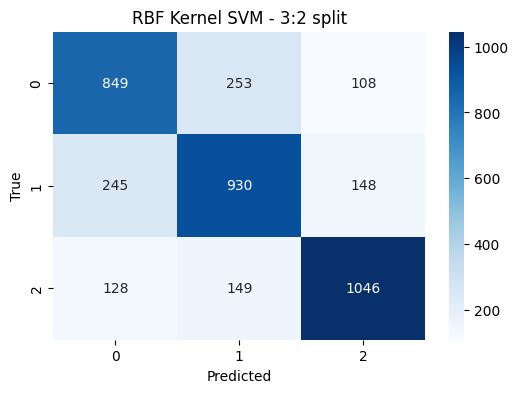

In [ ]:
for ratio_name, test_size in split_ratios.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results[ratio_name] = {}

    for model_name, model in models.items():

        if isinstance(model, tuple):
            classifier, kernel_approximator = model
            X_train_transformed = kernel_approximator.fit_transform(X_train_scaled)
            X_test_transformed = kernel_approximator.transform(X_test_scaled)

            classifier.fit(X_train_transformed, y_train)
            y_pred_test = classifier.predict(X_test_transformed)
            y_pred_train = classifier.predict(X_train_transformed)

            best_params = classifier.get_params()
        else:
            model.fit(X_train_scaled, y_train)
            y_pred_test = model.predict(X_test_scaled)
            y_pred_train = model.predict(X_train_scaled)

            if isinstance(model, GridSearchCV):
                best_params = model.best_params_
            else:
                best_params = model.get_params()

        acc_train = accuracy_score(y_train, y_pred_train)
        acc_test = accuracy_score(y_test, y_pred_test)
        cm = confusion_matrix(y_test, y_pred_test)
        report = classification_report(y_test, y_pred_test, output_dict=True)

        results[ratio_name][model_name] = {
            "train_accuracy": acc_train,
            "test_accuracy": acc_test,
            "confusion_matrix": cm,
            "report": report,
            "best_params": best_params
        }

        print(f"\n=== {model_name} ({ratio_name} split) ===")
        print(f"Train Accuracy: {acc_train:.4f}")
        print(f"Test Accuracy: {acc_test:.4f}")

        key_params = ['C', 'kernel', 'gamma', 'degree', 'coef0', 'max_iter']
        print("Best Params:")
        for param in key_params:
            if param in best_params:
                print(f"  {param}: {best_params[param]}")

        print(classification_report(y_test, y_pred_test))
        plot_conf_matrix(cm, f"{model_name} - {ratio_name} split")


In [ ]:
def print_summary_table_by_split(results_dict):
    import pandas as pd

    for ratio_name, models_result in results_dict.items():
        summary_data = []

        for model_name, metrics in models_result.items():
            train_acc = metrics["train_accuracy"]
            test_acc = metrics["test_accuracy"]
            report = metrics["report"]

            macro_avg = report.get("macro avg", {})
            precision = macro_avg.get("precision", 0)
            recall = macro_avg.get("recall", 0)
            f1 = macro_avg.get("f1-score", 0)

            summary_data.append({
                "Model": model_name.strip(),
                "Train Accuracy": train_acc,
                "Test Accuracy": test_acc,
                "Precision (Macro)": precision,
                "Recall (Macro)": recall,
                "F1-score (Macro)": f1
            })

        # Tạo DataFrame cho mỗi tỉ lệ
        df_summary = pd.DataFrame(summary_data).round(4)
        df_summary = df_summary.sort_values(by="Model")

        print(f"\n====== TỈ LỆ CHIA: {ratio_name} ======\n")
        print(df_summary.to_string(index=False))


In [ ]:
print_summary_table_by_split(results)


====== TỈ LỆ CHIA: 4:1 ======

                Model  Train Accuracy  Test Accuracy  Precision (Macro)  Recall (Macro)  F1-score (Macro)
 Hard/Soft Margin SVM          0.5653         0.5555             0.5500          0.5572            0.5489
      Multi-class SVM          0.5606         0.5493             0.5412          0.5499            0.5401
Polynomial Kernel SVM          0.8611         0.7158             0.7178          0.7147            0.7158
       RBF Kernel SVM          0.9378         0.7422             0.7426          0.7409            0.7415
   Sigmoid Kernel SVM          0.5636         0.5539             0.5487          0.5558            0.5472

====== TỈ LỆ CHIA: 7:3 ======

                Model  Train Accuracy  Test Accuracy  Precision (Macro)  Recall (Macro)  F1-score (Macro)
 Hard/Soft Margin SVM          0.5610         0.5533             0.5498          0.5551            0.5463
      Multi-class SVM          0.5598         0.5550             0.5477          0.5557 

### Thực hiện với dữ liệu giảm chiều

In [ ]:
from sklearn.decomposition import PCA

#### KNN

In [ ]:
def run_KNN_pca(X, y, test_size=0.2, random_state=42):
    # Chia dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # PCA sau khi chia train/test
    pca = PCA(n_components=15)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Khởi tạo và huấn luyện mô hình
    model = KNeighborsClassifier(
        n_neighbors=7,          # Số láng giềng tối ưu
        weights='distance',     # Trọng số dựa trên khoảng cách
        metric='manhattan'      # Khoảng cách Manhattan (tương đương Minkowski với p=1)
    )
    model.fit(X_train_pca, y_train)

    # Dự đoán trên cả train và test
    y_pred_train = model.predict(X_train_pca)
    y_pred_test = model.predict(X_test_pca)

    # Đánh giá
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    print(f"\n (test_size={test_size})")

    print(f"\nTrain Accuracy (PCA): {acc_train:.4f}")
    print(f"Test Accuracy (PCA): {acc_test:.4f}")
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_pred_test))

    report = classification_report(y_test, y_pred_test, output_dict=True)

    # Trực quan hóa
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix (test_size={test_size})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


 (test_size=0.2)

Train Accuracy (PCA): 0.9912
Test Accuracy (PCA): 0.7173

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.69      0.71      0.70       605
           2       0.67      0.67      0.67       662
           3       0.79      0.77      0.78       661

    accuracy                           0.72      1928
   macro avg       0.72      0.72      0.72      1928
weighted avg       0.72      0.72      0.72      1928



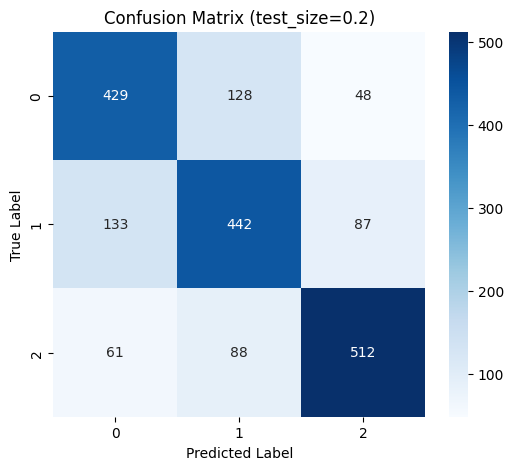


 (test_size=0.3)

Train Accuracy (PCA): 0.9918
Test Accuracy (PCA): 0.7230

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.70      0.71      0.71       908
           2       0.68      0.68      0.68       992
           3       0.79      0.78      0.78       992

    accuracy                           0.72      2892
   macro avg       0.72      0.72      0.72      2892
weighted avg       0.72      0.72      0.72      2892



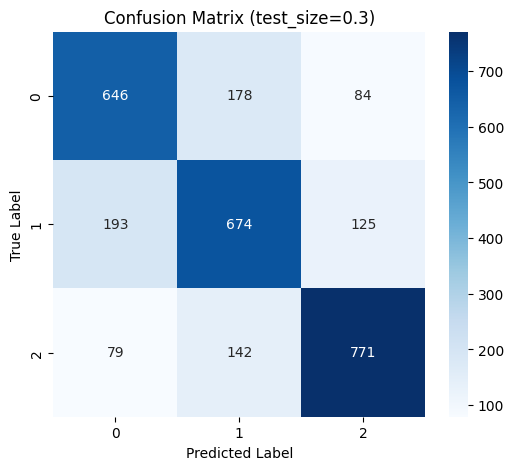


 (test_size=0.4)

Train Accuracy (PCA): 0.9939
Test Accuracy (PCA): 0.7041

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.68      0.69      0.69      1210
           2       0.65      0.65      0.65      1323
           3       0.78      0.77      0.77      1323

    accuracy                           0.70      3856
   macro avg       0.70      0.70      0.70      3856
weighted avg       0.70      0.70      0.70      3856



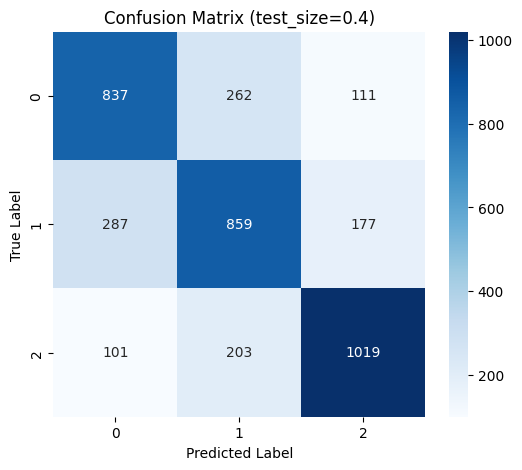

In [ ]:
run_KNN_pca(X, y, test_size=0.2)
run_KNN_pca(X, y, test_size=0.3)
run_KNN_pca(X, y, test_size=0.4)

#### MLP

In [ ]:
def run_perceptron_pca(X, y, test_size=0.2, random_state=42):
    # Chia dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Giảm chiều bằng PCA sau khi chia dữ liệu
    pca = PCA(n_components=15)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)


    # Khởi tạo mô hình MLP
    mlp = MLPClassifier(hidden_layer_sizes=(100, ),
                        activation='relu',
                        solver='adam',
                        max_iter=1000,
                        random_state=random_state)

    # Huấn luyện mô hình
    mlp.fit(X_train_pca, y_train)

    # Dự đoán trên cả train và test
    y_pred_train = mlp.predict(X_train_pca)
    y_pred_test = mlp.predict(X_test_pca)

    # Đánh giá
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    print(f"\n (test_size={test_size})")

    print(f"\nTrain Accuracy (PCA): {acc_train:.4f}")
    print(f"Test Accuracy (PCA): {acc_test:.4f}")

    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_pred_test))
    report = classification_report(y_test, y_pred_test, output_dict=True)

    # Trực quan hóa
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix (test_size={test_size})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


 (test_size=0.2)

Train Accuracy (PCA): 0.8248
Test Accuracy (PCA): 0.6955

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.66      0.65      0.65       605
           2       0.64      0.64      0.64       662
           3       0.78      0.79      0.78       661

    accuracy                           0.70      1928
   macro avg       0.69      0.69      0.69      1928
weighted avg       0.69      0.70      0.70      1928



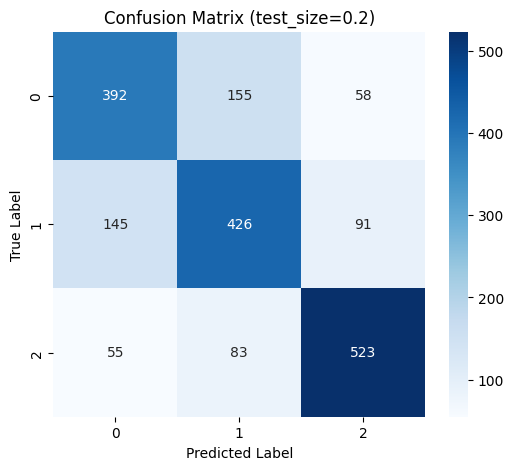


 (test_size=0.3)

Train Accuracy (PCA): 0.8359
Test Accuracy (PCA): 0.6974

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.66      0.67      0.67       908
           2       0.66      0.65      0.65       992
           3       0.77      0.76      0.77       992

    accuracy                           0.70      2892
   macro avg       0.70      0.70      0.70      2892
weighted avg       0.70      0.70      0.70      2892



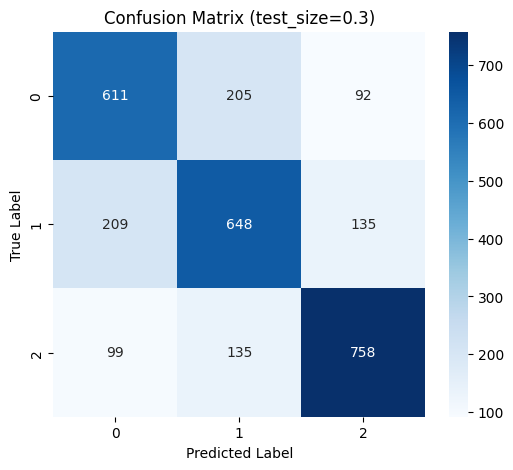


 (test_size=0.4)

Train Accuracy (PCA): 0.8439
Test Accuracy (PCA): 0.6914

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.67      0.65      0.66      1210
           2       0.64      0.63      0.64      1323
           3       0.76      0.79      0.77      1323

    accuracy                           0.69      3856
   macro avg       0.69      0.69      0.69      3856
weighted avg       0.69      0.69      0.69      3856



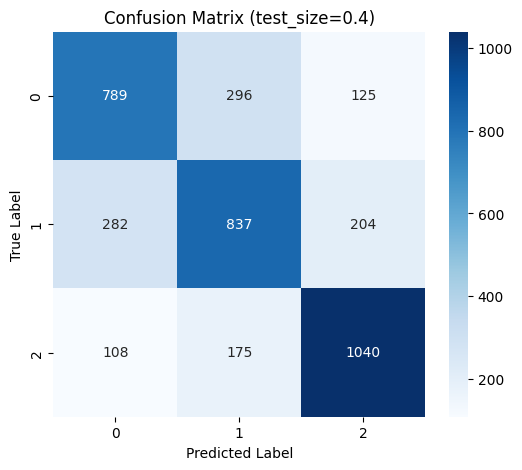

In [ ]:
run_perceptron_pca(X, y, test_size=0.2)
run_perceptron_pca(X, y, test_size=0.3)
run_perceptron_pca(X, y, test_size=0.4)

#### SVM


=== Hard/Soft Margin SVM  (4:1 split - PCA) ===
Train Accuracy: 0.5575
Test Accuracy: 0.5420
  C: 0.01
              precision    recall  f1-score   support

           1       0.49      0.60      0.54       605
           2       0.48      0.38      0.42       662
           3       0.65      0.66      0.65       661

    accuracy                           0.54      1928
   macro avg       0.54      0.54      0.54      1928
weighted avg       0.54      0.54      0.54      1928



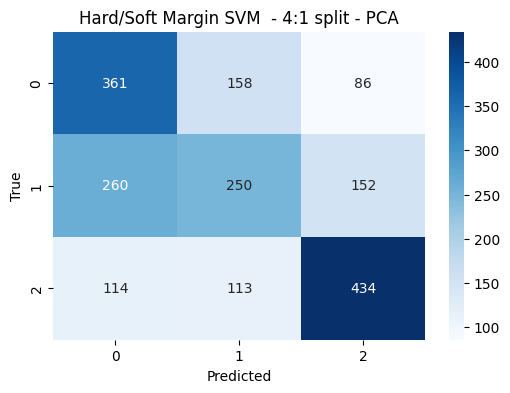


=== Multi-class SVM  (4:1 split - PCA) ===
Train Accuracy: 0.5506
Test Accuracy: 0.5405
  C: 1
              precision    recall  f1-score   support

           1       0.50      0.57      0.53       605
           2       0.49      0.35      0.41       662
           3       0.60      0.70      0.65       661

    accuracy                           0.54      1928
   macro avg       0.53      0.54      0.53      1928
weighted avg       0.53      0.54      0.53      1928



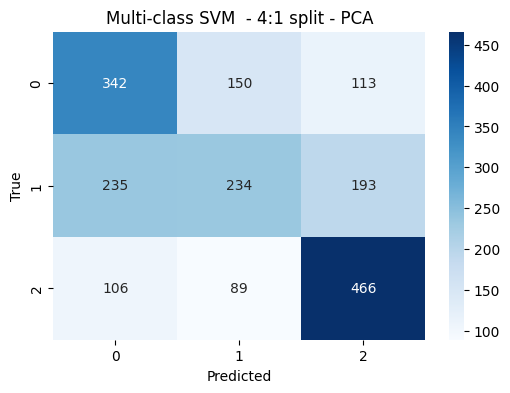

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



=== Polynomial Kernel SVM (4:1 split - PCA) ===
Train Accuracy: 0.8690
Test Accuracy: 0.6883
  C: 1
  gamma: 0.1
  degree: 4
  coef0: 0.5
              precision    recall  f1-score   support

           1       0.65      0.64      0.64       605
           2       0.62      0.68      0.65       662
           3       0.80      0.75      0.77       661

    accuracy                           0.69      1928
   macro avg       0.69      0.69      0.69      1928
weighted avg       0.69      0.69      0.69      1928



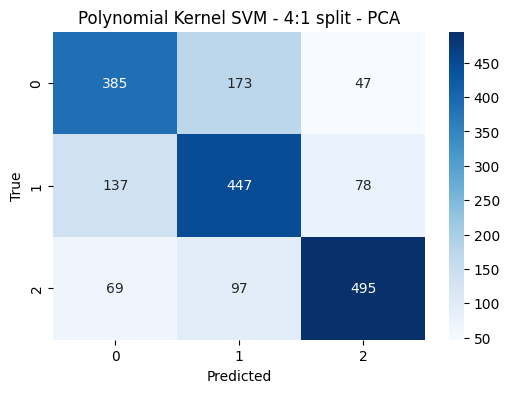


=== Sigmoid Kernel SVM (4:1 split - PCA) ===
Train Accuracy: 0.5570
Test Accuracy: 0.5420
  C: 10
  gamma: 0.001
  coef0: 0.0
              precision    recall  f1-score   support

           1       0.49      0.60      0.54       605
           2       0.48      0.38      0.42       662
           3       0.65      0.66      0.65       661

    accuracy                           0.54      1928
   macro avg       0.54      0.54      0.54      1928
weighted avg       0.54      0.54      0.54      1928



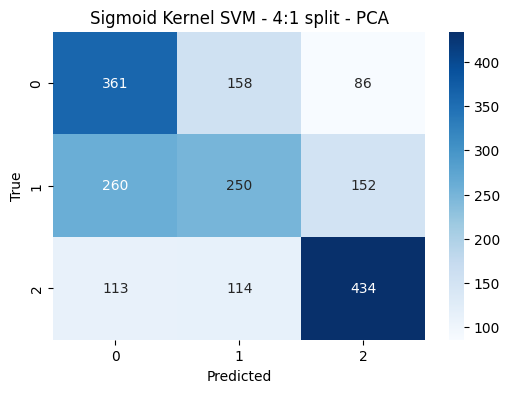


=== RBF Kernel SVM (4:1 split - PCA) ===
Train Accuracy: 0.8937
Test Accuracy: 0.7272
  C: 10
  gamma: 0.1
              precision    recall  f1-score   support

           1       0.70      0.69      0.69       605
           2       0.67      0.70      0.68       662
           3       0.82      0.79      0.80       661

    accuracy                           0.73      1928
   macro avg       0.73      0.73      0.73      1928
weighted avg       0.73      0.73      0.73      1928



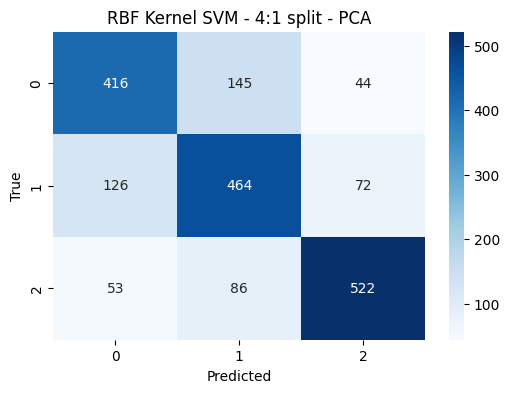

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



=== Hard/Soft Margin SVM  (7:3 split - PCA) ===
Train Accuracy: 0.5539
Test Accuracy: 0.5415
  C: 0.1
              precision    recall  f1-score   support

           1       0.48      0.60      0.54       908
           2       0.47      0.35      0.40       992
           3       0.65      0.68      0.66       992

    accuracy                           0.54      2892
   macro avg       0.54      0.54      0.53      2892
weighted avg       0.54      0.54      0.53      2892



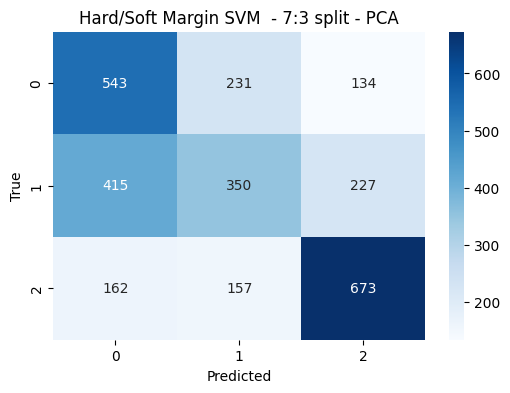


=== Multi-class SVM  (7:3 split - PCA) ===
Train Accuracy: 0.5514
Test Accuracy: 0.5450
  C: 1
              precision    recall  f1-score   support

           1       0.49      0.56      0.53       908
           2       0.50      0.35      0.41       992
           3       0.62      0.72      0.66       992

    accuracy                           0.54      2892
   macro avg       0.54      0.55      0.53      2892
weighted avg       0.54      0.54      0.54      2892



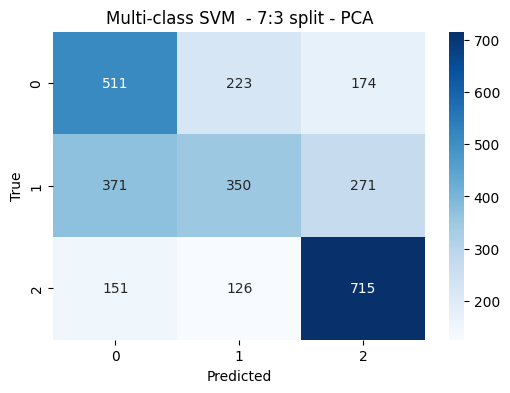

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



=== Polynomial Kernel SVM (7:3 split - PCA) ===
Train Accuracy: 0.7992
Test Accuracy: 0.6822
  C: 0.1
  gamma: 0.1
  degree: 4
  coef0: 1.0
              precision    recall  f1-score   support

           1       0.64      0.63      0.63       908
           2       0.62      0.66      0.64       992
           3       0.80      0.76      0.78       992

    accuracy                           0.68      2892
   macro avg       0.68      0.68      0.68      2892
weighted avg       0.69      0.68      0.68      2892



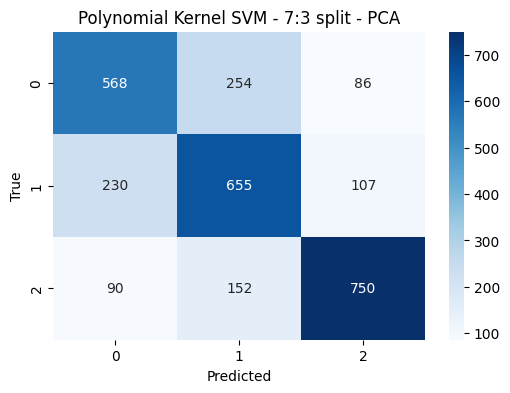


=== Sigmoid Kernel SVM (7:3 split - PCA) ===
Train Accuracy: 0.5514
Test Accuracy: 0.5432
  C: 10
  gamma: 0.001
  coef0: 0.0
              precision    recall  f1-score   support

           1       0.49      0.60      0.54       908
           2       0.48      0.36      0.41       992
           3       0.65      0.67      0.66       992

    accuracy                           0.54      2892
   macro avg       0.54      0.54      0.54      2892
weighted avg       0.54      0.54      0.54      2892



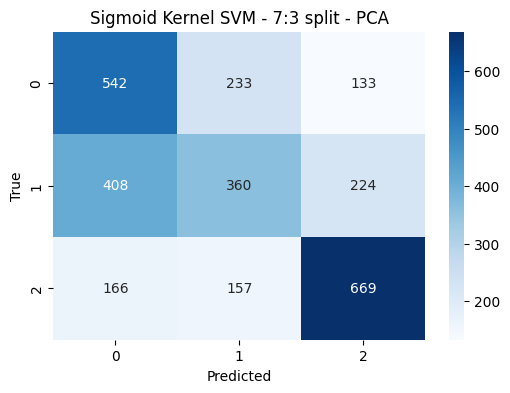


=== RBF Kernel SVM (7:3 split - PCA) ===
Train Accuracy: 0.8963
Test Accuracy: 0.7244
  C: 10
  gamma: 0.1
              precision    recall  f1-score   support

           1       0.68      0.70      0.69       908
           2       0.68      0.70      0.69       992
           3       0.81      0.77      0.79       992

    accuracy                           0.72      2892
   macro avg       0.73      0.72      0.72      2892
weighted avg       0.73      0.72      0.73      2892



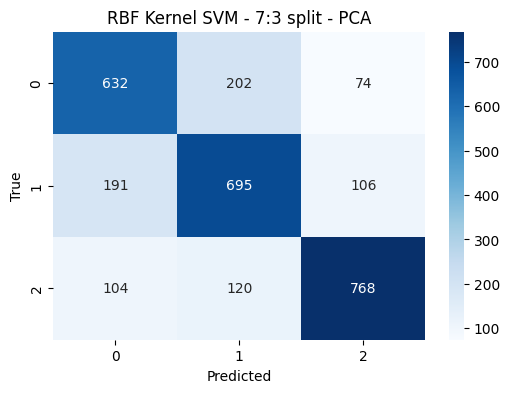

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



=== Hard/Soft Margin SVM  (3:2 split - PCA) ===
Train Accuracy: 0.5513
Test Accuracy: 0.5423
  C: 1
              precision    recall  f1-score   support

           1       0.49      0.59      0.53      1210
           2       0.48      0.36      0.41      1323
           3       0.65      0.68      0.66      1323

    accuracy                           0.54      3856
   macro avg       0.54      0.54      0.54      3856
weighted avg       0.54      0.54      0.54      3856



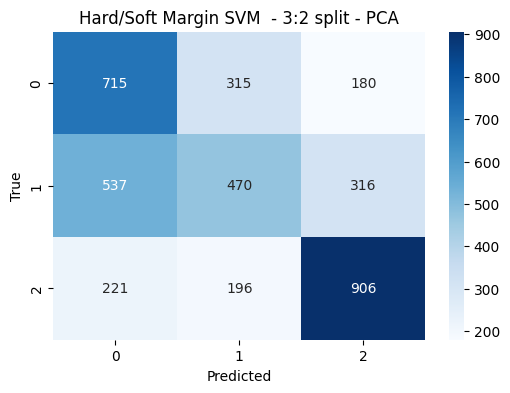


=== Multi-class SVM  (3:2 split - PCA) ===
Train Accuracy: 0.5535
Test Accuracy: 0.5480
  C: 10
              precision    recall  f1-score   support

           1       0.50      0.57      0.53      1210
           2       0.50      0.35      0.41      1323
           3       0.62      0.72      0.67      1323

    accuracy                           0.55      3856
   macro avg       0.54      0.55      0.54      3856
weighted avg       0.54      0.55      0.54      3856



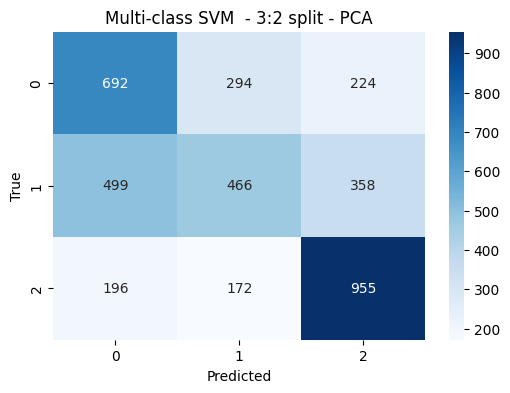

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



=== Polynomial Kernel SVM (3:2 split - PCA) ===
Train Accuracy: 0.8793
Test Accuracy: 0.6712
  C: 1
  gamma: 0.1
  degree: 4
  coef0: 0.5
              precision    recall  f1-score   support

           1       0.62      0.64      0.63      1210
           2       0.62      0.66      0.64      1323
           3       0.78      0.71      0.75      1323

    accuracy                           0.67      3856
   macro avg       0.67      0.67      0.67      3856
weighted avg       0.68      0.67      0.67      3856



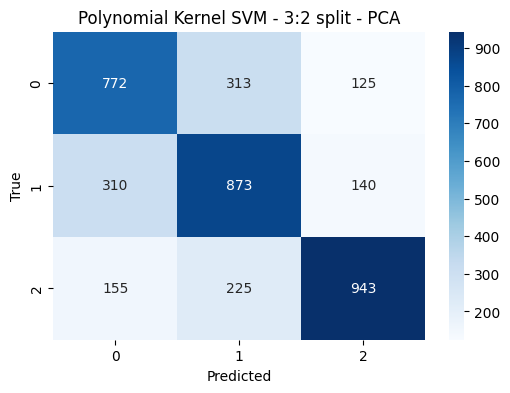


=== Sigmoid Kernel SVM (3:2 split - PCA) ===
Train Accuracy: 0.5514
Test Accuracy: 0.5384
  C: 10
  gamma: 0.001
  coef0: 0.0
              precision    recall  f1-score   support

           1       0.48      0.60      0.54      1210
           2       0.47      0.35      0.40      1323
           3       0.65      0.67      0.66      1323

    accuracy                           0.54      3856
   macro avg       0.53      0.54      0.53      3856
weighted avg       0.54      0.54      0.53      3856



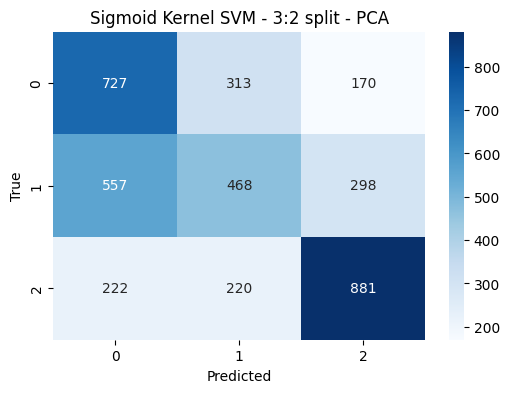


=== RBF Kernel SVM (3:2 split - PCA) ===
Train Accuracy: 0.9030
Test Accuracy: 0.7098
  C: 10
  gamma: 0.1
              precision    recall  f1-score   support

           1       0.66      0.69      0.67      1210
           2       0.67      0.68      0.68      1323
           3       0.80      0.76      0.78      1323

    accuracy                           0.71      3856
   macro avg       0.71      0.71      0.71      3856
weighted avg       0.71      0.71      0.71      3856



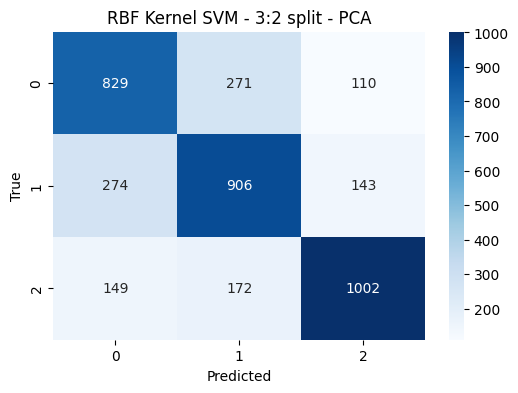

In [ ]:
for ratio_name, test_size in split_ratios.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Áp dụng PCA
    pca = PCA(n_components=15)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    results[ratio_name] = {}

    for model_name, model in models.items():

        if isinstance(model, tuple):
            classifier, kernel_approximator = model
            X_train_transformed = kernel_approximator.fit_transform(X_train_pca)
            X_test_transformed = kernel_approximator.transform(X_test_pca)
            classifier.fit(X_train_transformed, y_train)
            y_pred_test = classifier.predict(X_test_transformed)
            y_pred_train = classifier.predict(X_train_transformed)
            best_params = classifier.get_params()
        else:
            model.fit(X_train_pca, y_train)
            y_pred_test = model.predict(X_test_pca)
            y_pred_train = model.predict(X_train_pca)
            best_params = model.best_params_ if isinstance(model, GridSearchCV) else model.get_params()

        cm = confusion_matrix(y_test, y_pred_test)
        report = classification_report(y_test, y_pred_test, output_dict=True)

        results[ratio_name][model_name] = {
            "train_accuracy": accuracy_score(y_train, y_pred_train),
            "test_accuracy": accuracy_score(y_test, y_pred_test),
            "confusion_matrix": cm,
            "report": report,
            "best_params": best_params
        }

        print(f"\n=== {model_name} ({ratio_name} split - PCA) ===")
        print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
        print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
        for param in ['C', 'kernel', 'gamma', 'degree', 'coef0', 'max_iter']:
            if param in best_params:
                print(f"  {param}: {best_params[param]}")
        print(classification_report(y_test, y_pred_test))
        plot_conf_matrix(cm, f"{model_name} - {ratio_name} split - PCA")


In [ ]:
def print_summary_table_by_split(results_dict):
    import pandas as pd

    for ratio_name, models_result in results_dict.items():
        summary_data = []

        for model_name, metrics in models_result.items():
            train_acc = metrics["train_accuracy"]
            test_acc = metrics["test_accuracy"]
            report = metrics["report"]

            macro_avg = report.get("macro avg", {})
            precision = macro_avg.get("precision", 0)
            recall = macro_avg.get("recall", 0)
            f1 = macro_avg.get("f1-score", 0)

            summary_data.append({
                "Model": model_name.strip(),
                "Train Accuracy": train_acc,
                "Test Accuracy": test_acc,
                "Precision (Macro)": precision,
                "Recall (Macro)": recall,
                "F1-score (Macro)": f1
            })

        # Tạo DataFrame cho mỗi tỉ lệ
        df_summary = pd.DataFrame(summary_data).round(4)
        df_summary = df_summary.sort_values(by="Model")

        print(f"\n====== TỈ LỆ CHIA: {ratio_name} ======\n")
        print(df_summary.to_string(index=False))

In [ ]:
print_summary_table_by_split(results)


====== TỈ LỆ CHIA: 4:1 ======

                Model  Train Accuracy  Test Accuracy  Precision (Macro)  Recall (Macro)  F1-score (Macro)
 Hard/Soft Margin SVM          0.5575         0.5420             0.5389          0.5436            0.5375
      Multi-class SVM          0.5506         0.5405             0.5330          0.5413            0.5313
Polynomial Kernel SVM          0.8690         0.6883             0.6911          0.6868            0.6883
       RBF Kernel SVM          0.8937         0.7272             0.7283          0.7261            0.7270
   Sigmoid Kernel SVM          0.5570         0.5420             0.5389          0.5436            0.5376

====== TỈ LỆ CHIA: 7:3 ======

                Model  Train Accuracy  Test Accuracy  Precision (Macro)  Recall (Macro)  F1-score (Macro)
 Hard/Soft Margin SVM          0.5539         0.5415             0.5366          0.5431            0.5348
      Multi-class SVM          0.5514         0.5450             0.5373          0.5455 

## c) Chuyển bài toán về dạng hồi quy

### Thực hiện với dữ liệu nguyên bản

#### MLP

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
X = data_processed.drop(columns=['Stage'])
y = data_processed['Stage']

In [40]:
test_sizes = [0.2, 0.3, 0.4]
res = []

for test_size in test_sizes:
    # Chia dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # MLP
    mlp_model = MLPClassifier(hidden_layer_sizes=(100,),
                              activation='relu',
                              solver='adam',
                              max_iter=1000,
                              random_state=42)
    mlp_model.fit(X_train, y_train)

    # Dự đoán xác suất cho lớp 'Stage 3'
    y_prob_train = mlp_model.predict_proba(X_train)[:, 2]
    y_prob_test = mlp_model.predict_proba(X_test)[:, 2]

    models = [
        ('Linear Regression', LinearRegression()),
        ('Random Forest Regressor', RandomForestRegressor(n_estimators=300,
                                                          max_depth=20,
                                                          max_features='sqrt',
                                                          min_samples_split=2,
                                                          min_samples_leaf=1,
                                                          random_state=42))
    ]

    pca_models = [
        ('Linear Regression (PCA)', LinearRegression()),
        ('Random Forest Regressor (PCA)', RandomForestRegressor(n_estimators=300,
                                                                max_depth=20,
                                                                max_features='sqrt',
                                                                min_samples_split=2,
                                                                min_samples_leaf=1,
                                                                random_state=42))
    ]

    # Dữ liệu gốc
    for name, model in models:
        model.fit(X_train, y_prob_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        res.append({
            'Model': name,
            'Test Size': test_size,
            'Train MSE': mean_squared_error(y_prob_train, y_pred_train),
            'Test MSE': mean_squared_error(y_prob_test, y_pred_test),
            'Train MAE': mean_absolute_error(y_prob_train, y_pred_train),
            'Test MAE': mean_absolute_error(y_prob_test, y_pred_test),
            'Train R^2': r2_score(y_prob_train, y_pred_train),
            'Test R^2': r2_score(y_prob_test, y_pred_test),
            'Step': 'original'
        })

    # Giảm chiều
    pca = PCA(n_components=X_train.shape[1] // 3)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Dữ liệu giảm chiều
    for name, model in pca_models:
        model.fit(X_train_pca, y_prob_train)
        y_pred_train = model.predict(X_train_pca)
        y_pred_test = model.predict(X_test_pca)
        res.append({
            'Model': name,
            'Test Size': test_size,
            'Train MSE': mean_squared_error(y_prob_train, y_pred_train),
            'Test MSE': mean_squared_error(y_prob_test, y_pred_test),
            'Train MAE': mean_absolute_error(y_prob_train, y_pred_train),
            'Test MAE': mean_absolute_error(y_prob_test, y_pred_test),
            'Train R^2': r2_score(y_prob_train, y_pred_train),
            'Test R^2': r2_score(y_prob_test, y_pred_test),
            'Step': 'PCA'
        })

df_results = pd.DataFrame(res)
df_results = df_results.sort_values(by=['Test Size', 'Model', 'Step']).reset_index(drop=True)
df_results

,Model,Test Size,Train MSE,Test MSE,Train MAE,Test MAE,Train R^2,Test R^2,Step
0,Linear Regression,0.2,0.099325,0.099687,0.254190,0.254259,0.381988,0.368721,original
1,Linear Regression (PCA),0.2,0.111194,0.110018,0.273337,0.271526,0.308136,0.303299,PCA
2,Random Forest Regressor,0.2,0.003616,0.035061,0.042156,0.125862,0.977500,0.777973,original
3,Random Forest Regressor (PCA),0.2,0.010532,0.065828,0.076396,0.190889,0.934468,0.583137,PCA
4,Linear Regression,0.3,0.100664,0.098502,0.256175,0.252656,0.377970,0.379871,original
5,Linear Regression (PCA),0.3,0.112637,0.108531,0.276745,0.270225,0.303990,0.316729,PCA
6,Random Forest Regressor,0.3,0.004057,0.035984,0.045247,0.128902,0.974933,0.773456,original
7,Random Forest Regressor (PCA),0.3,0.011547,0.065751,0.080593,0.191811,0.928646,0.586054,PCA
8,Linear Regression,0.4,0.108222,0.108945,0.265176,0.267342,0.360465,0.356603,original
9,Linear Regression (PCA),0.4,0.120141,0.120770,0.284986,0.286775,0.290027,0.286765,PCA
